# Executive Summary/Abstract : 

The chosen dataset is the **world airport network** updated until June 2014 (with the available data at this time) which is describing the network of airports in the entire world. The dataset comes from OpenFlights project. The city/country information is not available in our graph and thus by using data found again in the OpenFlights open source project (Data Source), a matching between node ID and airport ID from the new downloaded dataset will add new information on the node. Thus, a graph representing the routes of airports was created by adding external information like Country or City of the airport to each node. The graph is directed, weighted with external information on the node.

**Using this network, we want to be able to analyze, if there is an outbreak of a contagious disease in an airport, how it would spread geographically across the world using the world flight traffic network and which airports should be targeted to impose quarantine(s).** These are the questions we have attempted to answer. Combining the world flight traffic network with additional labels of cities/countries and a world map, we will **visualize the spread using SIR models**. Then, using network dynamics notions (targeted attack) we would like to **identify hubs to quarantine in order to stop/contain the pandemic**.

**Our main findings were:** naturally, the infection spreads more rapidly to and within densely populated zones of the world, and less rapidly in peripheral areas, thus reflecting the nature of the airport network and world migration fluxes. Also, a larger size of the city where the infection starts is translated into a more rapid onset of the phase when the infection spreads rapidly. However, the size of the city does not matter a lot when it comes to the geographical evolution of the epidemics. We have also observed that identify the community in which an airport would be the location of a disease outbreak is helpful in determining, in advance, which air routes should be stopped in order to contain the infection within a particular community. More importantly, we found that a more effective containment procedure would be to put into quarantines at least more than 90% of the neighboring airports with highest degree (with the most air routes) in the case it would be impossible to have quarantined all neighbors. 


---

# Table of Contents :
   * 1) Introduction
       * 1.1) Data Acquisition and Preparation : World airport network
           * 1.1.1) Collection Website 
           * 1.1.2) Links
           * 1.1.3) General Description
           * 1.1.4) Koblenz File Description
           * 1.1.5) Routes Data Description
           * 1.1.6) Important features
           * 1.1.7) Additional External information
       * 1.2) Overview of Analysis
   * 2) Analysis
       * 2.1) Visualization and Summary
           * 2.1.1) Visualization and summary of the raw data
           * 2.1.2) Weighted network visualization and summary
           * 2.1.3) Geographical visualization of the network
       * 2.2) Global Analysis 
           * 2.2.1) Degree distribution 
           * 2.2.2) Connectivity 
           * 2.2.3) Network Distance 
           * 2.2.4) Clustering Coefficient  
           * 2.2.5) Centrality Measure 
           * 2.2.6) Reversed graph analysis
       * 2.3) Homophily and Community Analysis
           * 2.3.1) Homophily analysis
           * 2.3.2) Community Analysis
       * 2.4) Intermediate Interpretation
       * 2.5) Geographical spread of the infection, SIR model
       * 2.6) Quarantine analysis to stop the infection
   * 3) Conclusion
   * 4) Appendix: Project Structure



---
# 1) Introduction

## 1.1) Data Acquisition and Preparation: World airport network

### 1.1.1) Collection Website

**The selected dataset was taken from the Koblenz Network Collection in the infrastructure section.** Infrastructure networks are networks of physical infrastructure. Examples are road networks, airline connection networks, and power grids.

**Koblenz Network Collection is a project to collect large network datasets of all types in order to perform research in network science** and related fields, collected by the Institute of Web Science and Technologies at the University of Koblenz–Landau. KONECT contains several hundred network datasets of various types, including directed, undirected, bipartite, weighted, unweighted, signed and rating networks. The networks of KONECT cover many diverse areas such as social networks, hyperlink networks, authorship networks, physical networks, interaction networks, and communication networks.

### 1.1.1.2) Links

Here you can find 3 important links :
   * Link to the Koblenz Network Collection : [Koblenz Network Collection](http://konect.uni-koblenz.de/)
   * Link to the Koblenz webpage where the 'ready to use' dataset can be download : [OpenFlights Network Dataset](http://konect.uni-koblenz.de/networks/openflights)
   * Link corresponding to the real data source : [Raw Data Source](http://www.openflights.org/data.html)

### 1.1.1.3) General Description

**The chosen dataset is the world airport network updated until June 2014 (with the available data at this time) which is describing the network of airports in the entire world.** The dataset comes from **OpenFlights project**, which is a tool that lets you map your flights around the world, search and filter them in all sorts of interesting ways, calculate statistics automatically, and allows to share your flights and trips with friends and the entire world (if you wish). It's also the name of the open-source project to build the tool. The *Route data* used in this report were maintained by and imported directly from **Airline Route Mapper**. Airline Route Mapper was a Windows program for exploring route maps of over 550 airlines. Duplicate entry removal and cross-referencing to airport/airline IDs was done by OpenFlights project. These data span from 2009 to June 2014. Thus, the current data is of historical value only.

### 1.1.1.4) Koblenz File Description

The original file used to create the network is named *out.openflights*. This file is a text file. The text is a human-readable sequence of characters and the words they form can be encoded into computer-readable formats. Here is the format from the file : 1 48 ; 1 53 ; 1 54 ; 1 73 ; (where ; means return to the line). Each line corresponds to an edge between 2 nodes. In fact, the first element of this example means that an edge exists between the node 1 to the node 48. Thus, the representation/format used is a **Link List**. We use the *nx.read_edgelist()* command to read it.
**However, during our analysis, thanks to the geographical representation, we observe that Airports nodes corresponding to the US were missing in our graph. We thus investigate this fact in more depth. The conclusion was that the 'ready to use' Koblenz version has not the same node ID as when you compare with the raw data found on the openflights website. We thus decided to recreate our graph from scratch with the raw data to allow us to analyze the real world flights network.**

*Just an additional fact: in openflights data, approximately 7500 airports are listed. However, in the graph, we will create and analyze just approximately 3500 airports. This is due to the fact that we decided to create a graph with only airports having routes linking them. This information can be only found in the routes dataframe that will be the starting point of our analysis. This routes dataframe do not contain so many airports. This is due to different source used by openflight for creating the different dataset.*


### 1.1.1.5) Routes Data Description

[Airline Route Mapper](http://arm.64hosts.com/) was a Windows program for exploring route maps of over 550 airlines. Data were collected thanks in majority to scrapping and from DAFIF. DAFIF or the Digital Aeronautical Flight Information File was a comprehensive database of up-to-date aeronautical data, including information on airports, airways, airspaces, navigation data and other facts relevant to flying in the entire world, managed by the National Geospatial-Intelligence Agency (NGA) of the United States. A recent update of the tools uses GoogleEarth data.

<img src="./img/map.png"  width="1200">

As of June 2014, the OpenFlights/Airline Route Mapper Route **Database contained 67663 routes between 3334 airports on 548 airlines spanning the globe,** as shown in the map above. Each entry contained the following information:
   * Airline: 2-letter (IATA) or 3-letter (ICAO) code of the airline.
   * Airline ID: Unique OpenFlights identifier for airline data (see Airline).
   * Source airport: 3-letter (IATA) or 4-letter (ICAO) code of the source airport.
   * Source airport ID: Unique OpenFlights identifier for source airport (see Airport)
   * Destination airport: 3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
   * Destination airport ID: Unique OpenFlights identifier for destination airport (see Airport)
   * Codeshare: "Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
   * Stops: Number of stops on this flight ("0" for direct)
   * Equipment: 3-letter codes for plane type(s) generally used on this flight, separated by spaces
The data is UTF-8 encoded. **The special value \N was used for "NULL" to indicate that no value was available, and is understood automatically by MySQL.**

Thus, **data was downloaded in this format and then transform to allow the creation of the version we are currently using in our report.** In fact, based on this OpenFlights/Airline Route Database, **the airport codes were converted into id numbers for creating our nodes, and some columns were dropped.** Only two columns were just needed to construct the source dataframe of our Airport Network Graph which was *Source airport ID* and *Destination airport ID*. All the other columns were suppressed and after **suppressing data containing 'Null' in our selected subset, the final dataframe used for the creation of our graph used in our report was created.** In fact, this process allows the creation of an unweighted edge list that can be read with networkx.

These data represent flights collected by the OpenFlights.org project. **Each node is an airport, and a directed edge represents one flight by one airline.**  A **flight** in this dataset **is defined as a normally regularly occurring flight identified by its flight number (e.g., AF331), not individual flights (e.g., AF331 on June 14, 2015)**.  In the network, multiple edges may connect the same nodes, because multiple airlines may connect the same airports, and a single airline may have multiple flights connecting the same airports (usually, at a different time of days).  **Thus, the multiplicity of an edge gives a rough estimate of the traffic between two airports.**

Be careful: the dataset in the available version contains **at least one loop**:  A flight by Trigana Air Service (IATA code IL) from and to Iskandar Airport (IATA code PKN) in Indonesia.  It's not possible to know whether such entries are errors, or whether they represent legitimate flights, used for sightseeing. Due to this loop, the graph can be considered as a **Self Interacting graph.**

### 1.1.1.6) Important features

Thus as the first conclusion, here is a list of the most important features of the dataset used in this report :
   * The data collected was **not 'ready to use'**. Some operations were done in pandas to allows the creation of a nice edges list containing the entire set of world airports. Thus we collect the data ourselves for this part. Additional external data will be added in the following section.
   * As the network is modeling airplane flights, this physical process is by definition directed and the graph needs also to be directed. Thus, this dataset is **the directed network of flights in the world.** In fact, routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
   * Each **node correspond to one airport in the world**, each **edge represents a connection from one airport to another which means a route**.
   * The Airport graph is **unweighted.**
   * There is some aberrant value like **loops.**
   * Routes, where one carrier operates both its own and codeshare flights, are **listed only once.**
   
### 1.1.1.7) Additional External information

To make a nicer and more complete analysis, we would **need to add external information**. In fact, by using the edge list we just know the edges between airports and thus **just the raw graph.** The **city/country information is not available in our graph** for now and thus by using data found again in the openflights open source project ([Data Source](http://www.openflights.org/data.html)), a **matching between node ID and airport ID** from the new downloaded dataset will be made. Thanks to that, **additional information on the node will be added.** All the process will use the pandas' library. In fact, **according to the documentation of the project, the node ID should match perfectly the airport ID.**

As of January 2017, the OpenFlights Airports Database contains over 7,500 airports, train stations and ferry terminals spanning the globe, as shown in the map above. This dataset contains several features corresponding to information on each node of the edge list data we will use. Each entry contains the following information:

   * Airport ID: Unique OpenFlights identifier for this airport.
   * Name: Name of the airport. May or may not contain the City name. Sometimes Null values.
   * City: Main city served by an airport. It may be spelled differently from Name.
   * Country: Country or territory where the airport is located.
   * IATA: 3-letter IATA code. Null if not assigned/unknown.
   * ICAO: 4-letter ICAO code. Null if not assigned.
   * Latitude: Decimal degrees, usually to six significant digits. Negative is South, positive is North.
   * Longitude: Decimal degrees, usually to six significant digits. Negative is West, positive is East.
   * Altitude: In feet.
   * Timezone: Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
   * DST_ Daylight savings time:  One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). 
   * Tz database time zone: Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
   * Type: Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known.
   * Source: Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. 
   
To be precise, Airport base data was generated by from DAFIF and OurAirports, plus timezone information from EarthTools. All DST information were added manually. Significant revisions and additions were also made by the users of OpenFlights.

[OurAirports](http://ourairports.com/) is a free site where visitors can explore the world's airports, read other people's comments, and leave their own. The site is dedicated to both passengers and pilots. You can create a map of the airports you've visited and shared that map with friends. You can find the closest airports to you, and discover the ones that you haven't visited yet.
Behind the fun and features, OurAirports exists primarily as a public good. When Australia forced the US government to shut down public access to it's Digital Aeronautical Flight Information File (DAFIF) service in 2006, there was no longer a good source of global aviation data. OurAirports started in 2007 primarily to fill that gap: we encourage members to create and maintain data records for airports around the world, and they manage over 40,000 of them. Many web sites, smartphone apps, and other services rely on OurAirport's data, which is all in the Public Domain (no permission required).

## 1.2) Overview of Analysis


- The overall goal is to observe how a spreading phenomenon such as disease would evolve and travel on the world using this particular network of airport and air routes.
- First, a first analysis (Global analysis) of the network is performed in order to have a preliminary sense of the structure of the network. Essential network measures such as degree distribution, connectivity, network distance, clustering and centrality will help us do so. Also, homophily analysis and community detection might provide insight in the way airports are connected to each other and how this would affect the spread of a disease. 
- Then, using SIR models and by matching the network with geographical data, we model the evolution of the infection probability for each node over a simulation time. From this, we analyze the evolution of this probability from a geographical point of view, aiming to detect patterns and similarities when we perform the simulation with cities of different importance. 
- Then, based from the conclusion from before, we try two techniques with the aim to contain the spread of the infection. Namely, we seek to find which airports should be put into quarantine if the infection starts in London in order to contain the infection. First, we use communities to stop the infection, then we look at the degree of neighboring airports in order to see how many airports should quarantined in order to contain the infection.


---

**Imports**

In [13]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt
# numpy can be more efficient at getting sum, max, min, etc. out of arrays and lists.
import numpy as np
# Can be used to make the printing of certain objects (especially dictionaries and tuples) easier for humans.
import pprint
# Just a lazy way of supressing warnings
import warnings
warnings.filterwarnings('ignore')
import calysto
import pandas as pd
from IPython.core.display import HTML


# 2) Analysis

## 2.1) Visualization and Summary

### 2.1.1) Visualization and summary of the raw data

To see more details on the method to achieve this task, you can open the notebook *Load_data*.

Airport_Network Informations Summary: 

Name: 
Type: DiGraph
Number of nodes: 7686
Number of edges: 37505
Average in degree:   4.8797
Average out degree:   4.8797 


Information of the node labeled 1 :
{ 'City': 'Goroka',
  'Country': 'Papua New Guinea',
  'Latitude': -6.0816898345900015,
  'Longitude': 145.391998291}


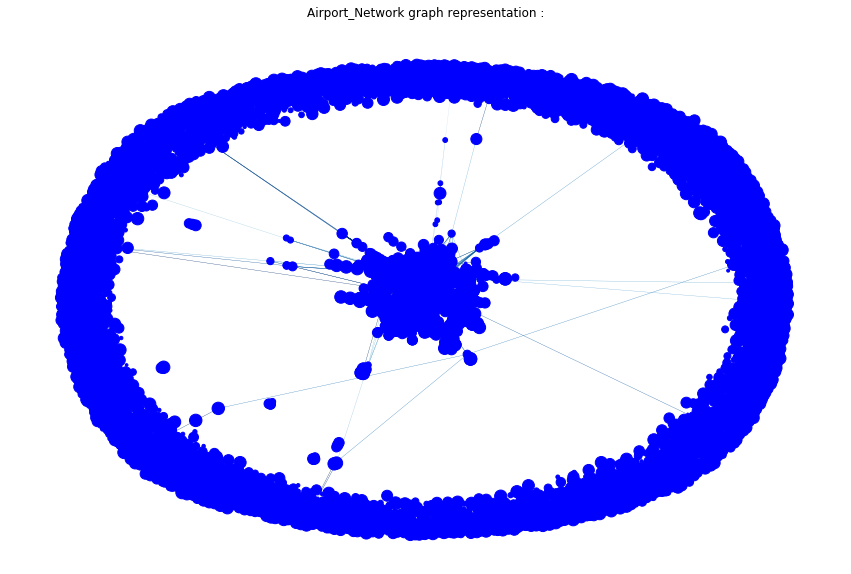

In [45]:
from load_data import load_data
from utils import plt_directed

# Add external information
Airport_Network = load_data()

# Print out the summary information of the graphs
print('Airport_Network Informations Summary: \n')
print(nx.info(Airport_Network),'\n')

#pp = pprint.PrettyPrinter(indent=2)
# Example of the different attributes of an node
print('\nInformation of the node labeled 1 :')
pp.pprint(Airport_Network.node['1'])

# Plot the graph thanks to the function define above
plt_directed(Airport_Network, 'Airport_Network graph representation :')

Thus, **a graph representing the routes of airports was created thanks to the raw data and not the 'ready to use' edge list**. Then, thanks to external data, **new information like Country or City** of the airport was added to each node. **At this stage, the graph is directed unweighted with external information on the node.**

***However, as you can see above, the majority of added nodes are not connected to the graph. Thus, not all the nodes will be preserved for our analysis but the entire set of routes linking nodes will be included in our object of study. This will give us the following network. In fact, the OpenFlights Airports Database can also contains train stations and ferry terminals spanning the globe, nods that we don't want to analyse.***

### 2.1.2) Weighted network visualization and summary

A weighted version of our graph has also been created to suppress the multiplicity of the edges. By doing that, the **weight of an edge shows the number of routes** (see above the strict definition of routes: Routes, where one carrier operates both its own and codeshare flights, are **listed only once.**) **on that connection in the given direction** and our Airport_Network graph becomes a **weighted directed graph.** To see more details on the method to do that you can open the notebook *Weighted_network*.


Airport_Network Informations Summary:
Name: 
Type: DiGraph
Number of nodes: 3334
Number of edges: 37505
Average in degree:  11.2493
Average out degree:  11.2493 


Information of the node labeled 1 :
{ 'City': 'Goroka',
  'Country': 'Papua New Guinea',
  'Latitude': -6.0816898345900015,
  'Longitude': 145.391998291}

Information of the edge labeled 1 :
{'2': {'Weight': 1}, '3': {'Weight': 1}, '4': {'Weight': 1}, '5': {'Weight': 2}}


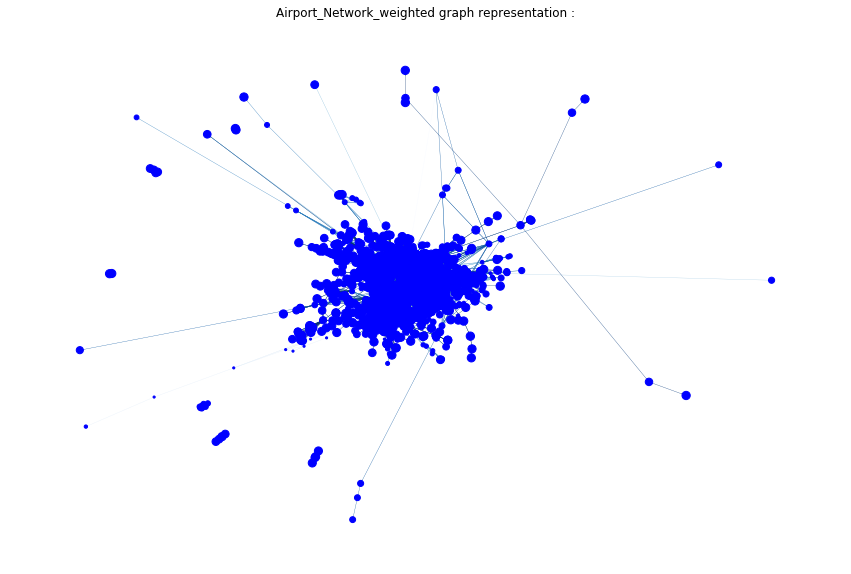

In [47]:
from load_data import weighted_network_creation
from utils import plt_directed

Airport_Network_weighted = weighted_network_creation()
#pp = pprint.PrettyPrinter(indent=2)

# Print out the summary information of the graphs
print('\nAirport_Network Informations Summary:')
print(nx.info(Airport_Network_weighted),'\n')

# Example of the different attributes of an node
print('\nInformation of the node labeled 1 :')
pp.pprint(Airport_Network_weighted.node['1'])
# Example of the different attributes of an edge
print('\nInformation of the edge labeled 1 :')
pp.pprint(dict(Airport_Network_weighted.adj['1']))

# Plot the graph thanks to the function define above
plt_directed(Airport_Network_weighted, 'Airport_Network_weighted graph representation :')

Thus, one new graph was created called Airport_Network_weighted: this is a directed weighted graph where the weight of an edge represents the number of routes on that connection in the given direction. Each node has information about the airport it represents. This graph will be the object of our study. The geographic representation is meaningful and the entire subset of edges is represented. Not all the airports present in the database are taking into account: the only ones analyzed are the ones for which edges exist and link them to other nodes.

As a conclusion of this part, two different networks were created :
   * **Airport_Network**: Directed Unweighted graph with duplicate edges that are a kind of invisible in the network. Each node has information about the airport it represents.
   * **Airport_Network_weighted (Object of study)** : Directed Weighted graph where the weight of an edge represents the number of routes on that connection in the given direction. Each node has information about the airport it represents.

### 2.1.3) Geographical visualization of the network

Thanks to the code above, a new window of your browser is opened allowing the visualisation of the graph on a world map. This process was succeeded using the longitude and latitude values of each node with the mplleaflet library. To see more details on the method to do that you can open the notebook *Geographical_visualization*.

In [4]:
from utils import Geographical_visualization
Geographical_visualization(Airport_Network)

Here you can see a picture illustarting the result of this visualization with mplleaf library :
<img src="./img/map_weighted.png"  width="800">

In [5]:
from utils import Geographical_visualization
Geographical_visualization(Airport_Network_weighted)

Here you can see a picture illustrating the result of this visualization with mplleaf library :
<img src="./img/map_network.png"  width="800">

## 2.2) Global analysis 

A global analysis of the main properties of the graph has been studied. **The majority of these properties are not essential to answer our problematic but they will help us to well understand our graph and to find some explanations about how the epidemic is spreading.**
We will thus sum up just below the main results found for each analyzed property. To see the code and to have more detailed information and conclusion for each measure you can open the notebook called *Global_analysis*. 

### 2.2.1) Degree distribution :

* There is a **high number of low degree node and a low number of high degree node.** This fact means that on average, airports propose a small subset of lines to the customers while some airports are big hubs making the bridge between all these smalls networks. This fact is also underlined by the distribution who seems to have a **decreasing exponential trend**. In fact, the size of the **right tail is very high**. It indicates the presence of several extreme values.
   
*  Our **network is sparse** with a density of 0.0032. The In-degree distribution and the Out degree distribution are similar. The **average in degree of the network is identical to the average out degree**. It makes sense because in our case, **as letting a plane on the ground is a huge financial loss, thus the in and out degree should be similar to optimize the profit. In fact, a plane that land should fly to another destination the fastest as possible to optimize the profit.**

* The two best distributions are the **power-law distribution for both in and out degree**. These kinds of broad distributions have a number of implications: **Hubs can be hugely connected and play big roles, these networks have no intrinsic scale, these networks can be universal, they are very likely to be a small world (hubs span local areas). The 2 first points are general properties of any broad (broader than exponential) distribution.**

___

**Thanks to this analysis, we conclude that airports can be divided into two kinds: the majority would have a small number of connections to other airports while a small part of them have a huge degree.  In and out degree are the same meaning that this fact (hubs existence) is true for connection from and to the same airport. The average number of connections going in or out an airport is 11 routes. The distribution indicates that hubs can be hugely connected, and can be universal. Thus, the quarantine analysis should probably focus on these hubs to prevent the spreading of the disease.**

___

### 2.2.2) Connectivity :

* We found that the largest Strongly connected graph from Airport_Network graph represent 98 % of the entire set of nodes of the network while the largest weakly connected component represent 99.2% of the network.

* The first surprising fact is that **the largest weakly connected component is not representing 100% of the network.** In fact, this means that some airports are not reachable at all and are not connected to all nodes of Airport_Network. **It's like independent networks by themselves, isolated from the world.** This was not expected as the goal of the planes' network is traveling around the world. In fact, with the globalization, the majority part of the world have been made reachable by plane. One explanation for this observation is the possible existence of small independent networks of small flights for example in a place like Polynesia. Indeed, Polynesia is made of a collection of the small island containing only small airports allowing just small planes to take off. Perhaps, if you wanted to go and visit the entire collection of islands you would take a big plane from Switzerland and land in a huge airport. Then, you would take a bus to go to a smaller airport taking a smaller plane to go and visit the island. This process would create a small independent network explaining this percentage.

* Then, the second important fact is **to understand is the meaning of the percentage of nodes in the largest strongly connected network.** This percentage is extremely high. In fact, it means that from an airport A, you are able to go to 98% of the entire collection of the world's airports taking a sequence of planes. It makes the large majority of airports (98%) reachable from anywhere in the network.

___

**Thus as a conclusion, we can point out that the large majority of airports (98%) are reachable from anywhere in the network and that some independent networks isolated from the entire network exist in small proportion. These facts are interesting for the spreading analysis: if the infection begins in an isolated network, just the nodes belonging to this subpart of the graph can be infected while, in the opposite case, 98% percent of the world airports are potentially infected nodes.**

___

### 2.2.3) Network Distance :

* The diameter of the largest Strongest component is 13 nodes and the one corresponding to the undirected weakly component is the same. To have the diameter of the weakly component, a conversion to an undirected graph has been done to allow the calculation as a graph not connected will have infinite path length. **This value of diameter is not high and it means that the network is well connected.** The results of the average shortest path are similar.


* This value of diameter is not high (for connecting more than 3000 nodes) and thus it means that the network is well connected/linked. This fact is also underlined by the average shortest path. The low average shortest means that the network is made of small subnetworks connected together and link to other subnetworks by weak ties. In fact, such a structure would explain this number. If it's true, this hypothesis will be verified at the end of the report during the community analysis.


* The other characteristic point out is that the weights have no effect on this measure. The explanation can come from a high number of weights equal to 1. As the average shortest path did not change with the weighted version, it means that the huge majority of weights equal to one are part of the shortest path. The edges forming the small subnetwork are 1 in the majority.

___

**Thus, the main thing to remember from this part is that the network is well connected which would induce an easier spreading of the infection. A graph with two structural levels begin to be observable.**

___

### 2.2.4) Clustering Coefficient  :

* The average clustering is 0.48, which is an intermediate value, while the overall clustering is low. It means that the two clustering coefficient seems to be opposed. The existing cluster taking into account in the average clustering calculus seems to not have the same effect on the transitivity which means that these clusters are probably not triangular but perhaps more linear.


* In some case, however, we may be interested in the distribution of the clustering coefficient over the nodes in the network. For instance, a network could have some very clustered parts, and some less clustered parts, while another network could have many nodes with a similar average clustering coefficient. This is the case of our graph where 1000 clustering coefficients are around 0, 900 coefficient is around 1, and 1500 are span between 0.1 and 0.9. **It means that the network can be divided into two part: one part of the nodes are forming perfect clusters while a second part of the nodes is doing the opposite. All these observations can be explained with a huge subgraph containing around 2000 nodes with a low clustering coefficient combined with the existence of several small subgraphs which are perfect cluster all linked by weak ties.**

___

**Thanks to this analysis, the existence of a graph with two structural levels begin to be more and more realistic. This structure can be really interesting to prevent the spreading of an infection.**

___


### 2.2.5) Centrality Measure :

This analysis also **underline the presence of big hubs with a majority of smaller airports as in the degree distribution analysis.**
This is observable in the distribution analysis and the scatter plots of these centrality measures.
In addition, this process is also illustrated by several Top10 where we have seen the importance of American and European airports. Moreover, some airports are present in the majority of the top10 (like Atlanta) showing their huge importance in the entire network.

___

**Again, targeting these big hubs to stop the spreading of an infection could be a really good idea.**

___

### 2.2.6) Reversed graph analysis :

The distributions, the scatters and the Top10 of the centrality measures of the reversed graph are similar to the one of the original network. 

___

**This conclusion underlines the fact that in and out degree are nearly identical due to the fact that airlines were constructed to allows the customer to do a round trip. In addition, this means that the study could have been made on the undirected graph directly, due to similarities between the in and out. The directed property of the graph is not so important in the case of this network. This is also true for the spreading of the illness: when it touched a new airport, the disease will not come back to the previous airport.** 
___


## 2.3) Homophily and Community Analysis

### 2.3.1) Homophily Analysis

**A country belonging homophily has been found.** This would mean that the entire graph is made by collections of smaller graphs as we said in the analysis before. **The new information found here is that this small subnetwork corresponds to the country network. This observation makes sense has the network in a country need to be dense and then weak ties are used to connect countries subnetworks together.** Moreover, weak ties presence can be deduced from the existence of countries that have no connections between themselves. It means that it's mandatory to make a stop in another country and take another flight. China and the United States are really present in this kind of category. **Thus all these conclusions reaffirm the assumptions made in the previous section on the structure of the graph.**

To understand well how we succeeded to draw these conclusions, you can look at the notebook called *Homophily_analysis*.

Just below, you can find a condensed version of our analysis :

___

*As we have seen before, it seems not to be wrong to study the undirected graph version. We will thus analyze the homophily in the undirected weighted version of the Airport_Network.*

***Homophily is the tendency of individuals to associate and bond with similar others, as in the proverb "birds of a feather flock together".*** *The presence of homophily has been discovered in a vast array of network studies. More than 100 studies that have observed homophily in some form or another and they establish that similarity breeds connection. These include age, gender, class, and organizational role.*

*Individuals in homophilic relationships share common characteristics (beliefs, values, education, etc.) that make communication and relationship formation easier. The opposite of homophily is heterophily or intermingling.*

In [7]:
Airport_Network_weighted = weighted_network_creation()
# Use the undirected version of the network for this one.
Undirected_Airport_Network = Airport_Network_weighted.to_undirected()
# Print basic informations on this new graph
print(nx.info(Undirected_Airport_Network))

Name: 
Type: Graph
Number of nodes: 3334
Number of edges: 19205
Average degree:  11.5207


*The number of edges is decreasing compared to the previous analysis as we study now the undirected version of the graph.*

*We calculate the percentage of nodes that belong to each of the country :*

In [8]:
# Creation of the dataframe containing the information of each nodes. Each line correspond to a node.
df = pd.DataFrame.from_dict(dict(Undirected_Airport_Network.nodes(data=True)), orient='index')

In [9]:
# Creation of the dataframe containing the information of each nodes. Each line correspond to a node.
df = pd.DataFrame.from_dict(dict(Undirected_Airport_Network.nodes(data=True)), orient='index')

# We focus on country having the biggest number of nodes
FocusCountries = ['Australia', 'Russia','United States','France', 'Canada', 'Germany', 'India', 'Brazil', 'United Kingdom', 'Japan', 'South Africa', 'Spain', 'China','Indonesia','Mexico', 'Norway', 'Colombia', 'Turkey']

# We iterate on the dataframe containing information of the nation and we create the 'Other' category.
list_country = []
for i in df['Country']:
    if i in FocusCountries:
        list_country.append(i)
    else :
        list_country.append('Other')

# We replace the feature with the new created list containing the categroy 'Other'
df['Country'] = list_country
df['Count'] = 1

# We groupby all the nodes having the same nation and we sum the count feature to have the number of node per nation
df_percentage = df.groupby('Country').sum()
df_percentage['percentage'] = df_percentage['Count']/df_percentage['Count'].sum()

*We then calculate the total number of links that nodes of each nation participate in. To do that we sum the degrees of all the nodes of each nation.*

In [10]:
degree_list=[]
# We store the dictionary containing as key the id of the node and as value the degree of the node
degree = nx.degree(Undirected_Airport_Network)

# We iterate on all the node of the graph with df.index and we add the degree feature in the overall dataframe
for i in df.index:
    degree_list.append(degree[i])
df['Degree'] = degree_list

# We do the same process as before but this time we are not interesting in summing the count column made with 1 but the degree column
df_nb_link = df.groupby('Country').sum()
df_nb_link.rename(columns = {'Degree':'Degree_Sum'}, inplace = True)

*For each of the nations, we calculate the number of links to country of the other countries :*

In [11]:
# Creation of the dataframe containing the information of each edge. Each line correspond to an edge.
df_edges= pd.DataFrame.from_dict(Undirected_Airport_Network.edges()).rename(columns = {0:'index', 1:'Target_node'}).set_index('index')

# We add to the list of Focus Countries, the category called Other as we want to take it into account
list_category = list(FocusCountries)
list_category.append('Other')

# We create the dataframe were the result will be store and we fill it with 0.
df_out = pd.DataFrame(index = df.index, columns = list_category).fillna(0)

for idx_source in df_out.index: # Here we iterate on each node of the graph
    if idx_source in df_edges.index : # We check if the id of the node taking into account has edges as source node
        df_tmp = df_edges.loc[idx_source] # We select the different edges with the node id corresponding to the source node
        if df_tmp.shape[0] > 1 : # This condition check if there are several edges going out of this source node
            for idx_target in df_tmp['Target_node']: # We iterate on the several edges taking into account the id of the target node
                country_target = df.loc[idx_target]['Country'] # We find the country of the target node
                df_out.loc[idx_source][country_target] += 1 # We add one to the corresponding category in the output dataframe
                country_source = df.loc[idx_source]['Country'] # We do the same for the target node coming from the edge taking into account
                df_out.loc[idx_target][country_source] += 1 
        elif df_tmp.shape[0] == 1 : # This condition check if there is just one edge going out of this source node and we do the same as before
            country_target = df.loc[df_tmp['Target_node']]['Country']
            df_out.loc[idx_source][country_target] += 1 
            country_source = df.loc[idx_source]['Country']
            df_out.loc[df_tmp['Target_node']][country_source] += 1 
            
# We add to the output dataframe the feature containing the nation of each node to allow a groupby
df_out = pd.merge(df[['Country']], df_out, left_index=True, right_index=True).rename(columns = {'Country':'country_source'})
df_out = df_out.groupby('country_source').sum()
df_out = df_out[df_out.index]
display(HTML(df_out.to_html()))

*We now divide the link counts calculated in the previous step by the link counts calculated in 2 previous steps. What you will get here is, for example, the percentage of links of the country from France that go to Italians airport.*

In [12]:
df_out_percentage = df_out.copy() # We make a copy of the out dataset to create the one where we will store the percentage
for i in df_nb_link.index:
    df_out_percentage.loc[i] /= df_nb_link.loc[i]['Degree_Sum'] # We use the dataframe previously calculated

In [13]:
list_nation_1, list_nation_2, percentage_list, nodes_list  = [], [], [], [] # these list will be used to create our new features
for i in df_out_percentage.index:
    for j in df_out_percentage.columns:
        list_nation_1.append(i) # the index of the df_out_percentage is the source nation
        list_nation_2.append(j) # the index of the df_out_percentage is the target nation
        percentage_list.append(df_out_percentage.loc[i][j]) # we select the corresponding value for the first feature
        nodes_list.append(df_percentage.loc[j]['percentage']) # we use the dataframe create in question 1 to fill up this feature

# We create the returned dataframe and we fill up the features
df_resume = pd.DataFrame(columns = ['Nation_1', 'Nation_2', '%_of_Nation_1_links_going_to_Nation_2', '%_of_nodes_that_belong_to_Nation_2', 'Ratio_of_the_two_previous_columns'])
df_resume['Nation_1'] = list_nation_1
df_resume['Nation_2'] = list_nation_2
df_resume['%_of_Nation_1_links_going_to_Nation_2'] = percentage_list
df_resume['%_of_nodes_that_belong_to_Nation_2'] = nodes_list 
df_resume['Ratio_of_the_two_previous_columns'] =  df_resume['%_of_Nation_1_links_going_to_Nation_2'] / df_resume['%_of_nodes_that_belong_to_Nation_2']
# We keep the one that are superior to 5
df_resume_tmp = df_resume[df_resume['Ratio_of_the_two_previous_columns']>5]


print('Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 superior to 5 :')
display(HTML(df_resume_tmp.sort_values('Ratio_of_the_two_previous_columns', ascending = False).to_html()))

Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 superior to 5 :


In [14]:
# We keep the one that are inferior to 0.05
df_resume_tmp_2 = df_resume[df_resume['Ratio_of_the_two_previous_columns']<0.05]

print('Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 inferior to 0.05')
display(HTML(df_resume_tmp_2.sort_values('Ratio_of_the_two_previous_columns', ascending = False).to_html()))

Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 inferior to 0.05


***In our network case, we are able to observe high Homophily between airports from the same nation. Thus, it's a country belonging homophily.*** *In fact, we can see in the table above and in a data frame printed before in step 4 (by looking at the diagonal of the output data frame) that* ***proportion of links linking airports from the same country is extremely high compared to links pointing to a foreign country.*** *This is really visible in the previous table thanks to the feature ratio of percentage_of_Nation_1_links_going_to_Nation_2 divide by percentage_of_nodes_that_belong_to_Nation_2 where the values for the same country are higher compared to values for different countries.*

*In addition, we are able **to identify countries that have no connections going from nation 1 to nation 2.** These are countries having really weak connexions. This means that to link these nations, **it's mandatory to make a stop in another country and take another flight. These kind of connection are the weak ties linking some subgraph.** This is really observable in the printed dataframe just above. The countries having no connexions are majority countries with a huge distance (in term of physical distance like kilometers) separating them, like for example, Indonesia or Australia with the rest of the world. This fact can also be an effect of the foreign politics of some countries which are quite close to foreigners.* 

___

**To conclude this part, a country belonging homophily has been found. This would mean that the entire graph is made by collections of smaller graphs as we said in the analysis before. The new information found here is that this small subnetwork corresponds to the country network. This observation makes sense has the network in a country need to be dense and then weak ties are used to connect countries subnetworks together. Moreover, weak ties presence can be deduced from the existence of countries that have no connections between themselves. It means that it's mandatory to make a stop in another country and take another flight. Thus all these conclusions reaffirm the assumptions made in the previous section on the structure of the graph.**

___

### 2.3.2) Community Detection

First, a visualization of the communities has been done allowing us to see that the graph has **small disconnected networks, each one form a different community (independent network, see above example on Polynesia).**
The entire network is made of smaller subgraphs. **The bigger subnetwork corresponds to wider geographic zones like Europe and Asia. In fact, in the real world, the airlines between theses part of the world are well developed in addition to the well-developed network inside each area.** This kind of well-linked network could produce a huge community. Analysis of the subgraph underlines that the collection of node belongs to a specific geographical area correspond to a community.

In addition, investigation on the induced graph shows **the existence of two encapsulated level of airport network.** The higher level corresponds to the mains airplanes routes in the world while the lower level corresponds to the more regional network allowing customers to reach smaller distances in term of a geographical metric.

To understand well how we succeeded to draw these conclusions, you can look at the notebook called *Community_analysis*.

Just below, you can find a condensed version of our analysis :

___

*Let us find the best partition using the Louvain algorithm. Since the algorithm involves some randomization, we fix the random seed to make it reproducible.*

In [15]:
Airport_Network_weighted = weighted_network_creation()
# Use the undirected version of the network for this one.
Undirected_Airport_Network = Airport_Network_weighted.to_undirected()

import community as community 
np.random.seed(42)
partition = community.best_partition(Undirected_Airport_Network)
labels = set(partition.values())
community_counts = {i: list(partition.values()).count(i) for i in labels}
print('The number of nodes in each community found with Louvain Algorithm in the undirected version of the graph: \n',community_counts)

The number of nodes in each community found with Louvain Algorithm in the undirected version of the graph: 
 {0: 258, 1: 512, 2: 759, 3: 76, 4: 532, 5: 379, 6: 9, 7: 165, 8: 213, 9: 22, 10: 98, 11: 10, 12: 23, 13: 26, 14: 9, 15: 3, 16: 16, 17: 10, 18: 10, 19: 6, 20: 114, 21: 12, 22: 25, 23: 12, 24: 4, 25: 4, 26: 4, 27: 8, 28: 7, 29: 4, 30: 2, 31: 2}


*Plot the network so that each node's color represents the community it belongs to:*

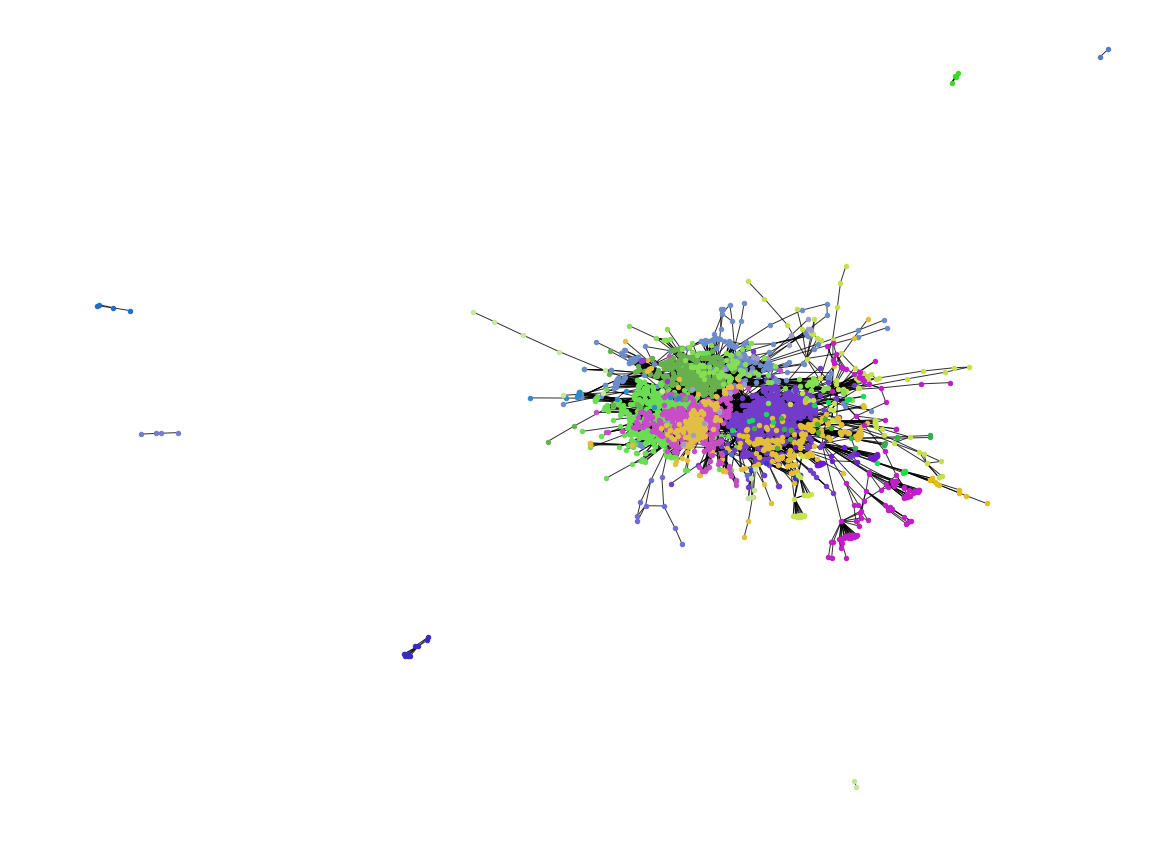

In [16]:
# define a colormap of 8 random colors
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5", "#e3be44",
                     "#e3be38", "#9d9dca", "#86de53", "#333bca", "#c6e44c", "#c54dc2", "#49af2e", "#5e6cd1",
                     "#2d8dca", "#11de53", "#392bca", "#c4e59c", "#c11dc9", "#34af4e", "#6e1cd1", "#e3be11",
                     "#1d6dca", "#16de53", "#777bca", "#c6e99c", "#8d3dca", "#36de23", "#567bca", "#c1e89c", "#c4e11c",])

plt.figure(figsize=(20,15))
pos = nx.spring_layout(Undirected_Airport_Network)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(Undirected_Airport_Network, pos, list_nodes, node_size = 20, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(Undirected_Airport_Network, pos, alpha=0.8)
plt.axis('off')
plt.show()

*This visualization of the communities reaffirm several results found during the analysis :*
   * ***The graph has small disconnected networks, each one form a different community (independent network, see above example on Polynesia)*** 
   * ***The entire network is made of smaller subgraphs.*** *As you can see on the list, there are 32 communities. 4 of them are huge (superior to 400 nodes) and the others are smaller (two around 200 nodes and then inferior to 50 nodes). The bigger subnetwork should correspond to wider geographic zones like Europe, South America and Asia. In fact, in the real world, the airlines between theses part of the world are well developed in addition to the well-developed network inside each area. This kind of well-linked network could produce a huge community.*

*Now, the analysis of some subgraph will be done to prove to reaffirm a kind of geographical homophily. In fact, nodes belonging to a community should be in the same geographical area.*

***Subgraph Analysis***

In [17]:
def list_node_community(Undirected_Airport_Network, partition, n):
    # Get the list of nodes in community labeled 5
    community_node = [nodes for nodes in partition.keys() if partition[nodes] == n]

    # Extract the graph
    graph_community_node = Undirected_Airport_Network.subgraph(community_node)

    # plot the graph of this community
    plt.figure(figsize=(12,8))
    nx.draw_networkx(graph_community_node, pos=nx.spring_layout(graph_community_node), node_size=500, alpha=0.8)
    plt.axis('off')
    plt.show()

    print('Airport belonging to this community are from :')
    for i in graph_community_node.node :
        print(graph_community_node.node[i]['City'],' from ', graph_community_node.node[i]['Country'])

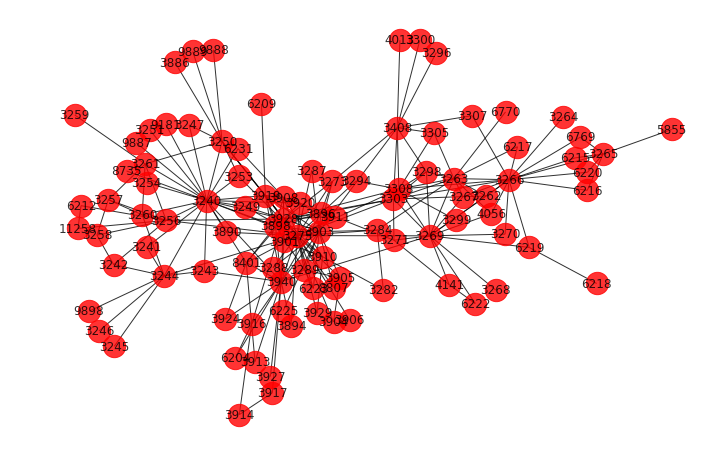

Airport belonging to this community are from :
Bario  from  Malaysia
Bandar Lampung-Sumatra Island  from  Indonesia
Bima  from  Indonesia
Ende  from  Indonesia
Solo City  from  Indonesia
Kupang  from  Indonesia
Saumlaki  from  Indonesia
Malang  from  Indonesia
Pontianak  from  Indonesia
Wamena  from  Indonesia
Denpasar  from  Indonesia
Merauke  from  Indonesia
Banjarmasin  from  Indonesia
Kuala Terengganu  from  Malaysia
Langkawi  from  Malaysia
Banda Aceh  from  Indonesia
nan  from  nan
Ketapang  from  Indonesia
Long Seridan  from  Malaysia
Luwuk  from  Indonesia
Bandung  from  Indonesia
nan  from  nan
Bakalalan  from  Malaysia
Alor Setar  from  Malaysia
Bengkulu  from  Indonesia
Jakarta  from  Indonesia
Jayapura  from  Indonesia
Naha  from  Indonesia
Yogyakarta  from  Indonesia
Tanjung Redep-Borneo Island  from  Indonesia
Pekanbaru  from  Indonesia
Batam  from  Indonesia
Oksibil  from  Indonesia
Limbang  from  Malaysia
Taraken  from  Indonesia
Johor Bahru  from  Malaysia
Long Datih  

In [18]:
list_node_community(Undirected_Airport_Network, partition, 10)

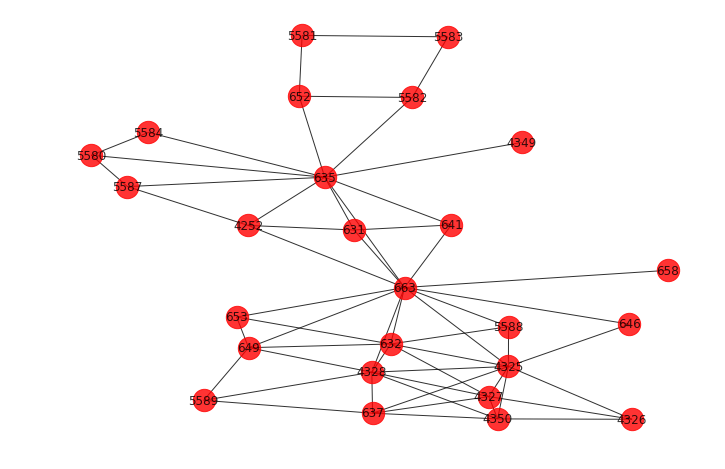

Airport belonging to this community are from :
Vardø  from  Norway
Svolvær  from  Norway
Alta  from  Norway
Andoya  from  Norway
Hasvik  from  Norway
Tromso  from  Norway
Stokmarknes  from  Norway
Batsfjord  from  Norway
Rørvik  from  Norway
Kirkenes  from  Norway
Hammerfest  from  Norway
Berlevag  from  Norway
Svalbard  from  Norway
Bodo  from  Norway
Lakselv  from  Norway
Vadsø  from  Norway
Harstad/Narvik  from  Norway
Narvik  from  Norway
Mehamn  from  Norway
Mosjoen  from  Norway
Røst  from  Norway
Namsos  from  Norway
Sorkjosen  from  Norway
Honningsvag  from  Norway
Leknes  from  Norway
Mo i Rana  from  Norway


In [20]:
list_node_community(Undirected_Airport_Network, partition, 13)

***In these subgraphs corresponding to one community each time, it can clearly be seen that the collection of node belongs to a specific geographical area. Thus, the conclusion drawn in the previous section using homophily seems to be true.***

***Induced Graphs Analysis***

*Given the partition, we can construct a new graph where the communities are now nodes, and each edge's weight is the total weight of edges between the corresponding communities. This new graph is said to be *induced* by the partition. The `community` function has an in-built function for this.*

In [23]:
induced_graph = community.induced_graph(partition, Undirected_Airport_Network)

In [24]:
def plot_graph(G):
    plt.figure(figsize=(12,8))
    pos = nx.random_layout(G)
    
    # plot nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, alpha=0.5)
    
    # plot edges with widths depending on weights
    nx.draw_networkx_edges(G, pos, width = [d['weight']/30 for u,v,d in G.edges(data=True)], font_color = 'k', alpha = 0.9)

    # add edges' labels with weights
    edge_labels=dict([((u,v), d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.axis('off')
    plt.show()

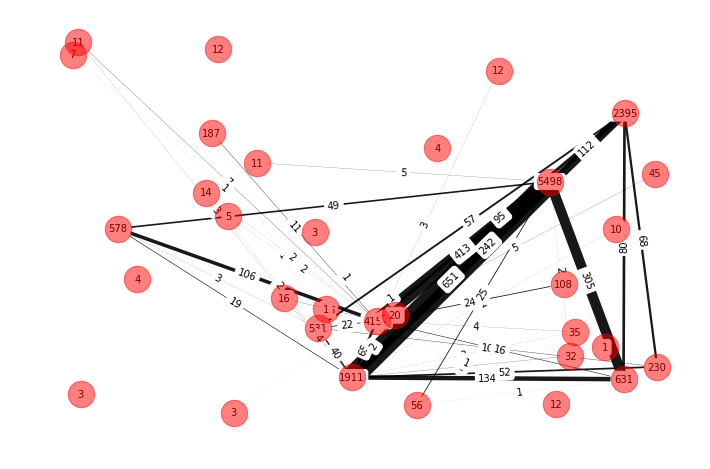

In [25]:
plot_graph(induced_graph)

*This graph representation shows us the interaction between each community.*
***The conclusion that can be drawn from this visualization is the existence of extremely important communities concentrating the more important part of the airports' activities.*** *This observation can be noticed thanks to the huge edges. It makes sense with the real world: think about Europe connected to Asia, connected to North America connected to South America and then again connected to Europe as an example. Moreover, thanks to this graph, we can also notice* ***the existence of smaller communities inside a smaller geographical area which are more regional airports and routes compared to the big edges corresponding to the mains routes in the world.***

*These main roads can be better visualized by putting a threshold on edges weights :*

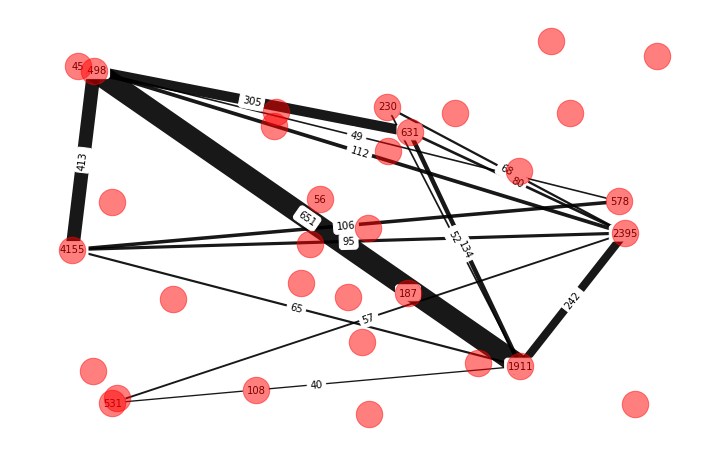

In [26]:
# specify the threshold
threshold = 40
T_reduced = community.induced_graph(partition, Undirected_Airport_Network)

# find the edges which weight is less than the threshold
edges_to_remove = [(u,v) for u,v,d in T_reduced.edges(data=True) if d['weight'] < threshold]

# remove these edges from the graph
T_reduced.remove_edges_from(edges_to_remove)

plot_graph(T_reduced)

***Investigate on the induced graph shows the existence of two encapsulated level of airport network. The higher level corresponds to the mains airplanes routes in the world while the lower level corresponds to the more regional network allowing customers to reach smaller distance in term of geographical metric.***

___

**To conclude on these two parts, these two encapsulated level property of the network can be really useful to find the best quarantine strategy. In fact, our main goal will be to save the bigger number of nodes in the world. Perhaps isolating a large geographical region of the world (one community) or one wide geographical area like Europe or one country can be a good strategy. The number of infected airports could be minimized thanks to this strategy.**

___

### 2.4) Intermediate Interpretation

   * The graph represents the routes of airports and is directed by definition of the physical process it models. Then, thanks to external data, new information like Country or City of the airport was added to each node. Two versions of the graph were made: unweighted and weighted where weights correspond to the multiplicity of edges that also gives a rough estimate of the traffic between two airports.
   * Airports can be divided into two kinds: the majority would have a small number of connections to other airports while a small part of them have a huge degree. In addition, we can point out that the large majority of airports (98%) are reachable from anywhere in the network and that some independent networks isolated from the entire network exist in small proportion.
   * The network is made of small subnetworks connected together and linked to other subnetworks by weak ties.
   * We learn that the weights have no real huge impact. It just allows an apparition of some extreme values representing the biggest airport Hubs. In several Top10, we have seen the importance of American and European airports. Moreover, some airports there in the majority of top10 (like Atlanta) showing their huge importance in the entire network. A kind of geographical notion begins to be observable.
   * From the reversed graph centrality analysis, a conclusion underlining the fact that in and out degree are nearly identical is drawn. This can be due to the way airlines were constructed to allows the customer to do a round trip. Thus, the directed property of the graph is not so important in the case of this network, as the majority of the edge are going in both ways. 
   * From homophily analysis, a country belonging homophily has been found. The new information found here is that the small subnetwork composing the network corresponds to the country network. This observation makes sense has the network in a country need to be dense and then weak ties are used to connect countries subnetworks together.
   * From the community analysis, all the previous conclusions were reaffirmed. In subgraphs corresponding to one community each time, it can clearly be seen that the collection of node belongs to a specific geographical area. Moreover, the graph has small disconnected networks, each one form a different community (independent network, see above example on Polynesia). The entire network is made of smaller subgraphs. 
   * Induced graph investigation shows the existence of two encapsulated level of airport network. 

***The presence of these communities which are defined by country homophily will be extremely important in our analysis of the spreading of the infection. In fact, weak ties could be targeted to try to stop the spreading.
Moreover, hubs like London Heathrow will have a huge impact on the spreading and thus we will focus a part of our analysis on this kind of nodes.***


## 2.5) Geographical evolution of an epidemics with SIR model


In [10]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIRModel as sir
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend 

**Note: to push on git we had to display only a subset of images, thus forming snapshots of the GIF animation that were produced originally. This is also why some cells are commented, as they are meant to produce GIFs from generated images.**

The goal here is to gain insights into how an infection would spread on the world if it were to start in a given city using the network of air routes to spread. The assumptions here are that an infection would first break out within a city and, still within this city, spread from inhabitant to inhabitant. Therefore, when we say that the outbreak starts in a city, we will use all nodes corresponding to all airports "belonging" to the city. This is motivated by the fact that people from a city may use different airports, depending on destinations or airlines, for example. This makes the setting more realistic. Also, it emphasizes the importance of the city in the way the number of airports in a city reflects its relative importance.
We aim to see how the size of a city and its airports, using the degree of the nodes (number of air routes per airports) would affect the geographical evolution of an epidemics around the world.

According to [this page](https://wanderwisdom.com/transportation/Top-5-Largest-Airports-in-the-World), one of the biggest airport in the world in 2017 is: 
-  **London Heathrow Airport, UK (LHR, 7th)**

when considering the total number of passengers that depart of arrive from the airport. "Largest" airports could be determined using other metrics, such as fret traffic or size of the infrastructures, yet the current metric is suitable when considering the spread of a disease transmitted through people. 

In addition, let us choose an airport of medium size, such :
- **Lyon Airport, France (LYS)**

And now a rather small airport, which we may also consider as somewhat isolated:
-  **Harare Airport, Zimbabwe (HRE)**

In [24]:
from collections import defaultdict

selected_cities = ['London','Lyon', 'Harare']
all_nodes = nx.get_node_attributes(Airport_Network_weighted,'City')
city_nodes = defaultdict(list)

for node_idx, city_name in all_nodes.items():
    if city_name in selected_cities:
        city_nodes[city_name].append(node_idx)
city_nodes

n_nodes = Airport_Network_weighted.number_of_nodes()

Degrees of these nodes:

In [19]:
for node in city_nodes.values():
    for n in node:
        print('Node {} has degree {}.'.format(n, Airport_Network_weighted.degree(node)[n]))

Node 174 has degree 10.
Node 507 has degree 342.
Node 492 has degree 170.
Node 502 has degree 330.
Node 548 has degree 305.
Node 503 has degree 71.
Node 1005 has degree 25.
Node 1335 has degree 155.


The combined degrees of each node for a given city motivates us in selecting the cities of London, Lyon and Harare as three cities of decreasing "importance" and size. Also, these three cities are all big cities, or "metropoles". London is the capital of the UK and one of the biggest city in the world and the biggest city in Europe. London is a so-called "world" city. Lyon is the second biggest urban area of France, in a densely populated region, itself in the densely populated Europe yet still of a smaller scale than London. Finally, Harare is the capital of Zimbabwe, a sparsely populated country in a sparsely populated continent yet remains a city of more than 1 million inhabitants. 

Therefore, such cities are plausible candidates in the scenario that some new kind of disease or virus would appear suddenly in a city which has therefore the potential to effectively engender a pandemics. Naturally, it could have been interesting to also pick a very small, local airport, or aerodrome, yet this would not suit the scenario of a worldwide geographical spread as well, as an outbreak in such a small town would perhaps die off within the city.

In [36]:
def time_infected(iterations):
    '''
    Given a simulation, return a dictionary with the number of steps
    since each node was infected.
    '''
    res = {i: 0 for i in iterations[0]['status'].keys()}
    
    current_status = {}
    
    for it in iterations:
        current_status.update(it['status'])
        for k, v in current_status.items():
            if v != 0:
                res[k] += 1
    
    return res

def pair_elements(*args):
    '''
    Put elements together to make it easier to plot.
    '''
    output = []
    for node_id in args[0].keys():
        output.append(tuple(i[node_id] for i in args))
    return np.array(output)

coord = pair_elements(nx.get_node_attributes(Airport_Network_weighted, "Latitude"),
        nx.get_node_attributes(Airport_Network_weighted, "Longitude"))

### Outbreaks in different cities

In the SIR model, S refers to susceptible, the nodes that are not infected with the disease yet, but they are not immune to it either and there is a possibility to become infected with the disease in the future. The I refers to the nodes which are currently infected. These are nodes that are infected with the disease and can transmit the disease to the susceptible nodes. Last, the R refers to the nodes which have recovered from the disease and are immune, so they can no longer be infected with the disease. Nodes go from state S to I with probability $\gamma$ and from I to R with probability $\beta$.

Parameters $\beta$ and $\gamma$ were set to values optimized for the Assignment 4 as they represent a good equilibrium between two possibilities: the pandemics may take off relatively quickly but in some cases after a few iterations it is also possible that the infection dies off.

In [37]:
#Model parameters
beta = 0.01
gamma = 0.01 
n_iter = 150
print('Cities of interest are:', city_nodes.keys())

Cities of interest are: dict_keys(['London', 'Harare', 'Lyon'])


Here, we simulate an outbreak 5 times for the same city, over 150 iterations. At each iteration, a node infects a neighboring node with probability $\beta=0.01$ while an infected node recovers with probability $\gamma=0.01$. Since there is a stochastic component in this simulation, it is necessary to simulate several times in order to obtain **the probability of infection for a given node at a given iteration** in the expected simulation, that is, what we would expect on average. The results below present the probability of infection without conditions. In other words, once a node has been removed and therefore cannot be infected again, its probability will reduce over time. This is such that one should not perceive that all nodes may be infected increasingly more throughout the 150 iterations but rather put the emphasis on the nodes that are currently infected. Although in the SIR model the "recovered" state is definitive, this allows us to envision the fact that recovered nodes may possibly be infected in the future. This is similar than the SIS model which we did not simulate. The motivation behind this is to account for possible "rebounces" of the epidemics, which is a scenario naturally observed. In fact, diffusion network models tend to be more and more SIS rather than SIR as in large networks a phenomenon may never die but only move around.

In [38]:
def InitializeSIRModel(InitialInfected, Network, beta=0.01, gamma=0.01): #note that InitialInfected is a list of node ids
    sir_model = sir.SIRModel(Network) #create the ndlib model object
    
    #initialize the parameters
    sir_cfg = mc.Configuration()
    sir_cfg.add_model_parameter('beta', beta)
    sir_cfg.add_model_parameter('gamma', gamma)
    
    sir_cfg.add_model_initial_configuration('Infected', InitialInfected) #infect the nodes at which the infection starts

    sir_model.set_initial_status(sir_cfg)

    return sir_model#, sir_iter, trends

def average_over_simulation(model, n_nodes, n_iterations = 100, n_simulations = 10): #n_nodes has to be the number of nodes in the network
    'Return probability of each node to be susceptible/infected/removed at each iteration.'
    
    # create empty arrays for probabilities
    prob_susceptible = np.ndarray(shape=(n_iterations, n_nodes))
    #prob_infected = np.ndarray(shape=(n_iterations, n_nodes))
    prob_infected_tot = np.zeros(shape=(n_iterations, n_nodes))
    prob_removed = np.ndarray(shape=(n_nodes, n_iterations))

    
    for i in range(n_simulations):  
        print('Simulation {}...'.format(i))
        prob_infected = np.zeros(shape=(n_iterations, n_nodes))

        #Simulate:
        for j in range(n_iterations):
            #Iterate and get status
            sir_model.iteration()
            current_status = sir_model.status 
            copy_status = copy.deepcopy(current_status)
            
            # assign status 0 to removed status
            for key, value in copy_status.items():
                if value == 2:
                    copy_status[key] = 0 
            if (2 in copy_status.values()): print('Problem')
            prob_infected[j] = np.array(list(copy_status.values()))

        model.reset()  
        
        #update:
        prob_infected_tot = np.add(prob_infected_tot, prob_infected)
    
    prob_infected_tot = np.divide(prob_infected_tot, n_simulations) 
    return prob_infected_tot 

### London, UK - a large city in a densely populated region

In [28]:
import copy 

#Get nodes i.e. all airports of the city
nodes = city_nodes['London']
nodes

n_iter = 150
n_sim = 5

#Init. model and average
sir_model = InitializeSIRModel(nodes, Airport_Network_weighted, beta = beta, gamma = gamma)
sir_model.get_status_map()
prob_london = average_over_simulation(sir_model, n_nodes, n_iterations = n_iter, n_simulations = n_sim)
sir_model.reset()

Simulation 0...
Simulation 1...
Simulation 2...
Simulation 3...
Simulation 4...


Making sure that this is indeed probabilities (max. possible value is 1.0):

In [29]:
print(np.max(prob_london))

1.0


In [30]:
#a colormap for the probabilities of infection
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize

prob_color = cm.get_cmap('summer')
norm = plt.Normalize()

Now, let's see the evolution of infection probabilities for each node through the simulations (average), using some functions to plot the density map and create a time animation of all simulations:

In [31]:
import os, sys
import datetime
import imageio
from pprint import pprint
import time
import datetime
e = sys.exit


def plot_density_map(prob, iteration_number, title = 'Infected airports'):
    fig, ax = plt.subplots(figsize = (8, 4), dpi=100)
    scatter = plt.scatter(coord[:, 1], coord[:, 0], s=0.8, c = prob_color(norm(prob[iteration_number])), alpha = 1.0, marker = '.')
    sm = cm.ScalarMappable(cmap=prob_color, norm=norm)
    sm.set_array([])
    bar = plt.colorbar(sm)
    bar.set_label('Infection probability')
    plt.xlabel('Latitude', fontsize = 10)
    plt.ylabel('Longitude', fontsize = 10)
    title = 'Infected airports at iteration {}'.format(iteration_number)
    plt.title(title, fontsize=12)
    plt.show()
    return fig

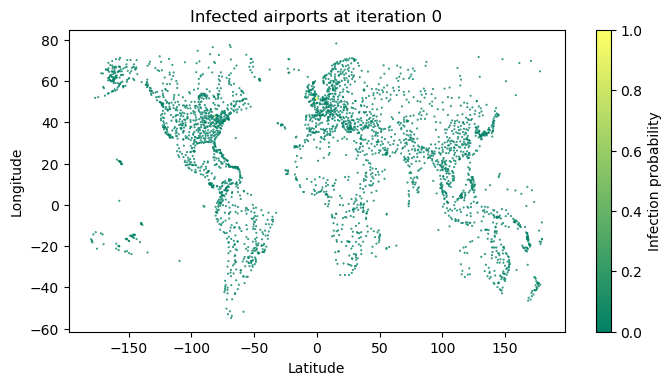

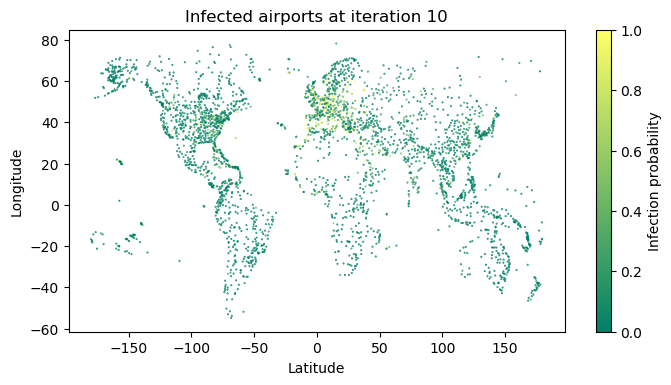

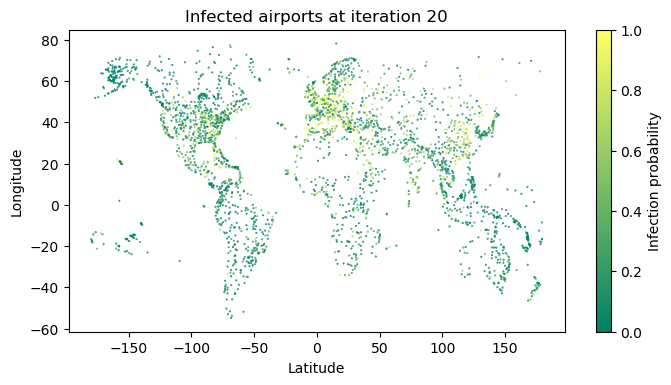

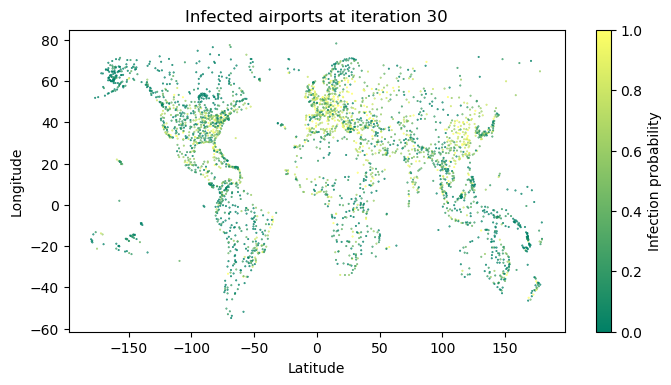

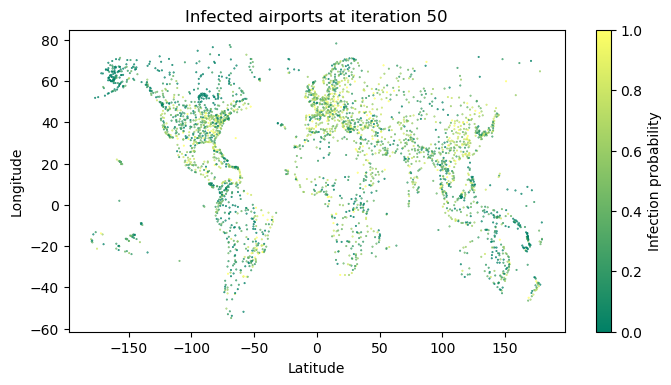

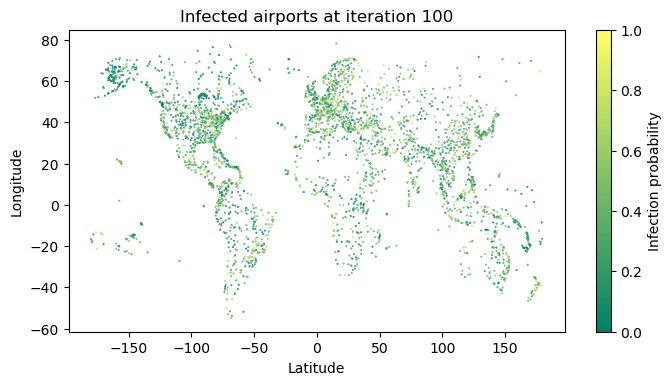

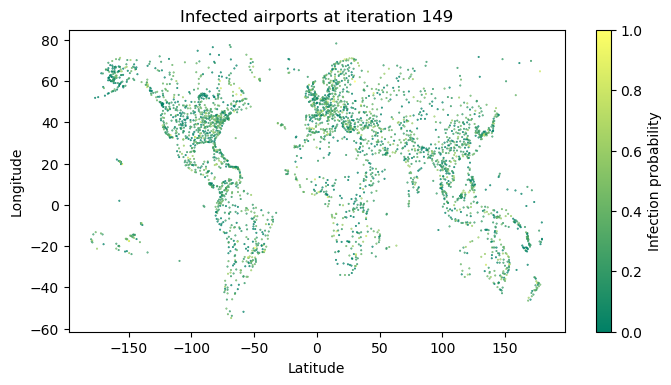

In [39]:
for i in [0, 10, 20, 30, 50, 100, 149]:
    fig = plot_density_map(prob_london, i)
    #save images 
    #fig_title = '{}_lon_map'.format(i)
    #fig.savefig(fig_title+'.png')

 **Analysis**
  - **First**, and quite naturally, the probability of infection increases more rapidly (after a few iterations only) in the most densely populated and most populous areas of the world, such as: 
      - the North-Eastern coast of the United States, which correspond to the megalopolis from Washington D.C. to Boston
      - Eastern Asia but more precisely Japan and the Eastern coast of China
      - Western Europe
  - These areas also correspond to regions which have "world" cities in their cores, such as New York City, Shanghai or Tokyo, for example. These cities have major significance in world affairs, in terms of finance, culture, economy, politics, although at different extent. This is quite logical as populous regions are more connected to each other and there are more exchanges thus explaining that an infection would first spread on the major axis of exchange in the world.
  - Also, since these areas are themselves densely populated and contain numerous airports, the epidemics spread first more quickly within these three world megalopolises (D.C.-Baltimor-NYC-Boston / the London-Frankfurt-Milano axis / Japan). 
  
  - **Also**, we observe that the next regions infected correspond to secondary regions of global importance which are characterized by usually one very populous or "important" city, but not as much as the major megalopolises of the world. These areas include:
      - South East Asia (Singapore)
      - South-Eastern Brazil (Rio de Janeiro/Sao Paulo)
      - Western USA (Los Angeles)
      - Mexico City
  - These regions and cities are also world cities in the sense that they have major regional influence and significance, yet less than the famous New York City, London, Tokyo trio.
  - Therefore, it makes sense that they would be infected at a second stage of the worldwide spread of the epidemics.
  - **Then**, we notice that there areas that are affected much later, if not affected at all, such as:
      - Alaska, US
      - Northern Europe (Northern Scotland and Northernmost Scandinavia)
      - Melanesia in the Pacific Islands
      - the Northern part of the Andes cordillera
      - central Amazonia and the outback of Australia
  - These areas include countries economically developed with (supposedly) developed infrastrucures (_e.g_ Alaska or Northern Europe) and countries less so economically developed such as the countries in Melanesia. However, it seems that all these areas are characterized by a much less dense population, which may explain why they are infected later, or not at all. 
  - Also, we observe that areas such as Northern Norway and the Australian outback resist infection surprinsingly well, as they display very low infection probability while being just next to areas where infection probability are very high (e.g. Brisbane, Australia). In the case of the Australian outback, this could be explained by the fact that these airports are very small and not so used, considering the fact that there are major airports nearby, such as Brisbane / Gold Coast, from which it is possible to drive to the outback instead of catching another plane.

### Lyon, France - a medium airport

Let's do the same for a smaller city yet in a densely populated area.

In [40]:
#Get nodes i.e. all airports of the city
nodes = city_nodes['Lyon']
nodes

['1335']

Simulation:

Simulation 0...
Simulation 1...
Simulation 2...
Simulation 3...
Simulation 4...


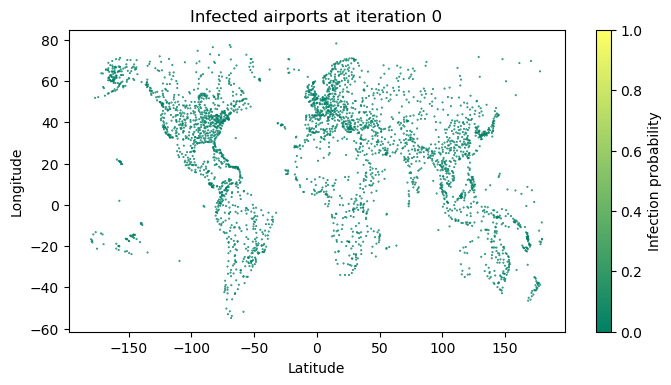

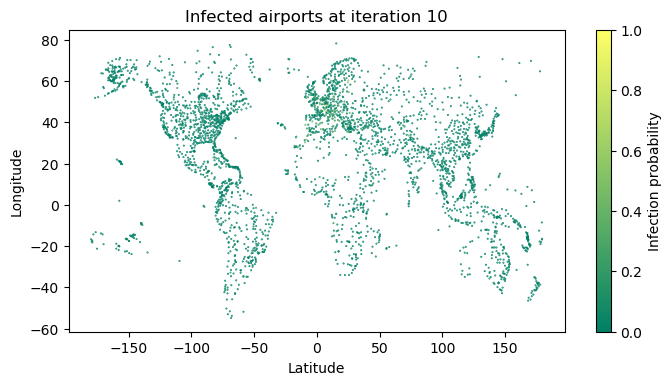

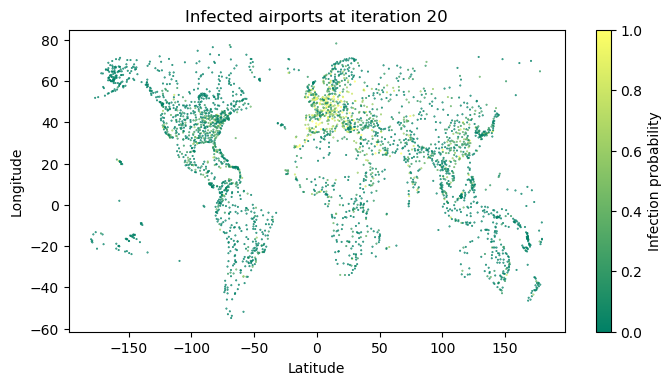

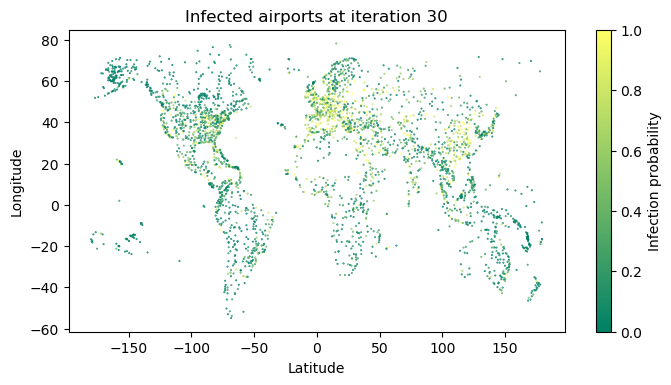

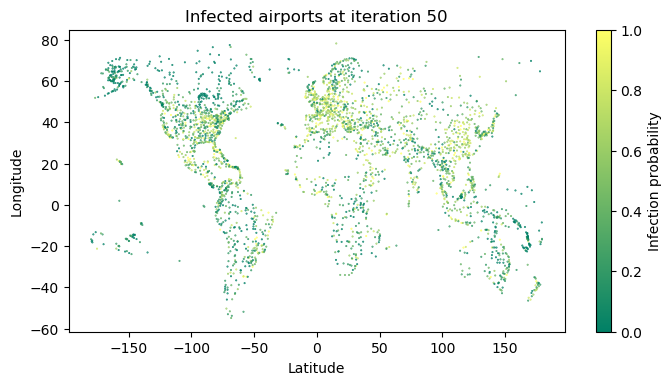

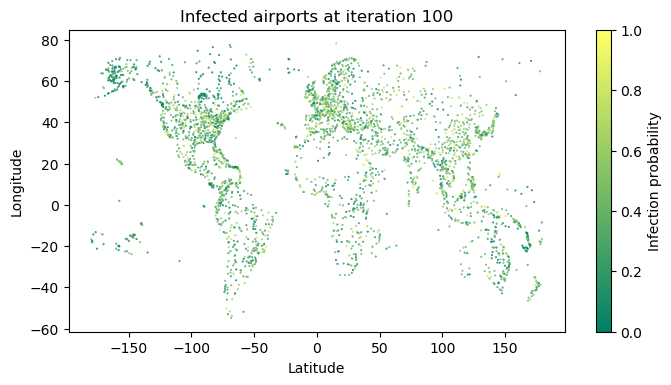

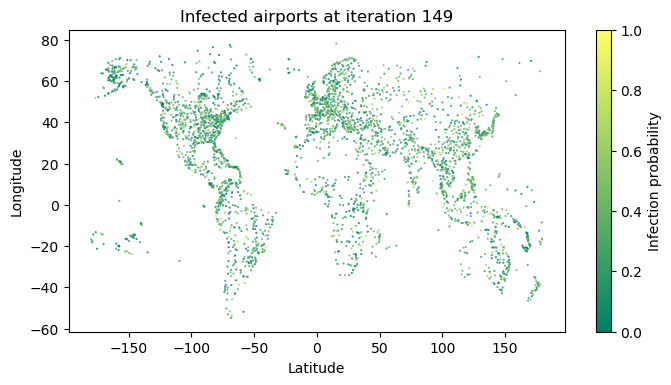

In [41]:
n_iter = 150
n_sim = 5

#Init. model and average
sir_model = InitializeSIRModel(nodes, Airport_Network_weighted, beta = beta, gamma = gamma)
sir_model.get_status_map()
prob_lyon = average_over_simulation(sir_model, n_nodes, n_iterations = n_iter, n_simulations = n_sim)
sir_model.reset()

for i in [0, 10, 20, 30, 50, 100, 149]:
    fig = plot_density_map(prob_lyon, i)
    #save images 
    #fig_title = '{}_lyon_map'.format(i)
    #fig.savefig(fig_title+'.png')

**Analysis**
- The first observation is the fact that the same regions exhibit higher infection probabilities yet at a lower pace. Indeed, comparing iteration 20 between when the outbreak starts in London versus when it starts in Lyon shows that the three areas of Western Europe, Eastern USA and Eastern China/Japan have lower infection probabilities for a lot more airports.
- Also, the order at which specific regions start to show higher infection probabilities is very similar between the two simulations. In particular, it is the onset at which global infection is clearly visible that differs most. By onset, we refer to the few iterations where we see nodes becoming more and more yellow, that is when the infection probability clearly increases.
- Similarly, peripheral areas indicate the same tendency as before: they are infected on average much later than the rest. 
- Thus, with a city such as Lyon, with an airport of regional importance in a region that is densely populated and with a lot of infrastructures, we observe some notable differences such as the onset of the pandemics.

### Harare, Zimbabwe - a small airport


Now, let us repeat the process again with a small airport in a region of low population density:

In [42]:
#Get nodes i.e. all airports of the city
nodes = city_nodes['Harare']
nodes

['1005']

Simulation 0...
Simulation 1...
Simulation 2...
Simulation 3...
Simulation 4...


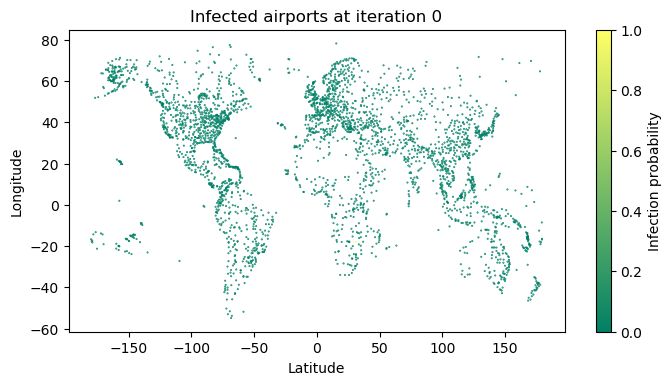

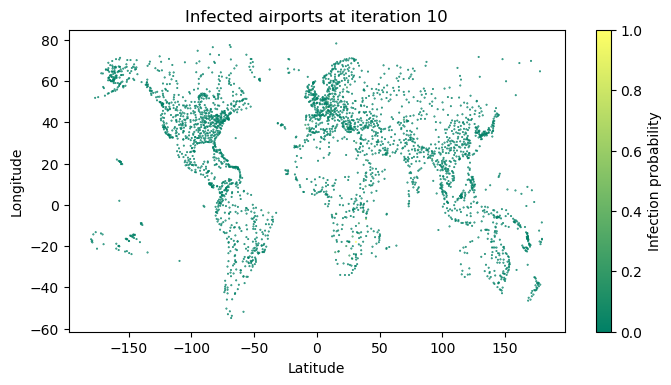

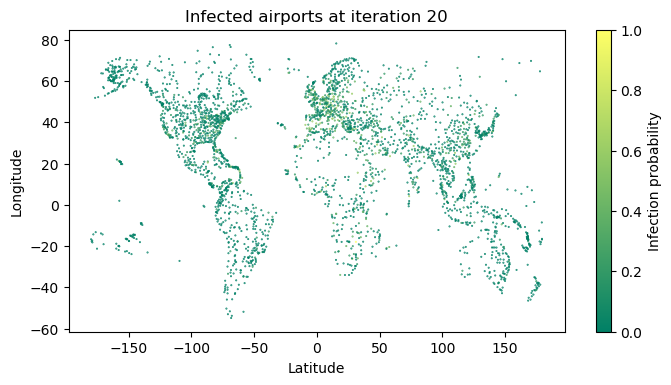

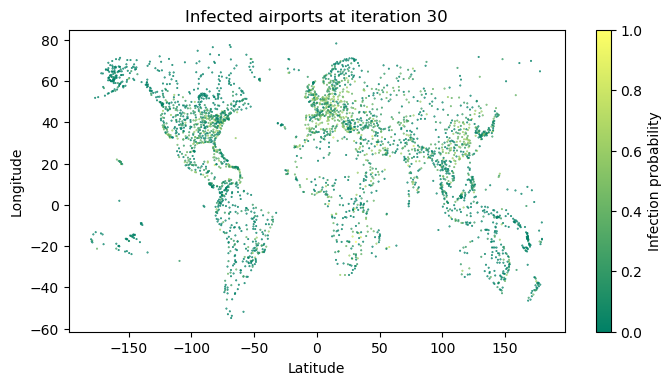

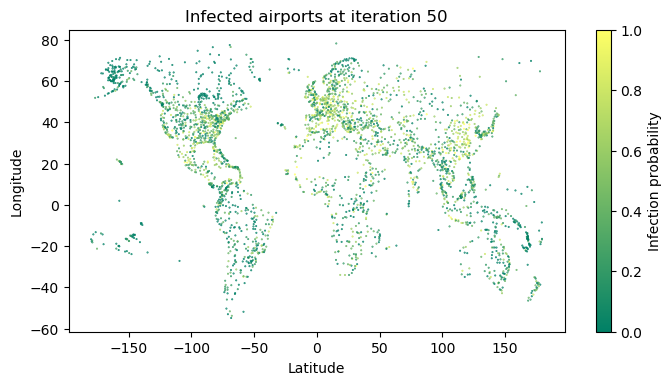

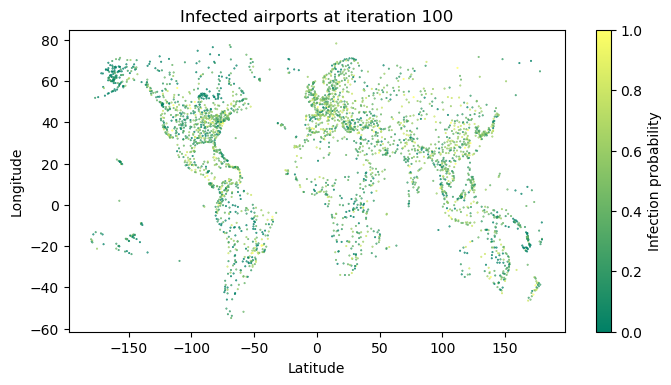

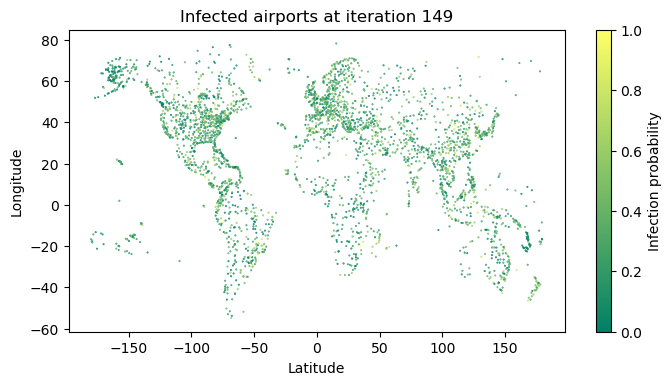

In [43]:
n_iter = 150
n_sim = 5

#Init. model and average
sir_model = InitializeSIRModel(nodes, Airport_Network_weighted, beta = beta, gamma = gamma)
sir_model.get_status_map()
prob_har = average_over_simulation(sir_model, n_nodes, n_iterations = n_iter, n_simulations = n_sim)
sir_model.reset()

for i in [0, 10, 20, 30, 50, 100, 149]:
    fig = plot_density_map(prob_har, i)
    #save images 
    #fig_title = '{}_lyon_map'.format(i)
    #fig.savefig(fig_title+'.png')

**Analysis**:
- We observe the same pattern in terms of the order of which large areas will start to be more likely infected.
- Again, as the airport is smaller (as shown assumed by its degree), it connects to less airports and, additionally, has a longer distance to major hubs, such as London for example. As a result, the moment where more nodes starts to be visibly more likely to be infected occur much higher.
- The moment where the pandemics is at its peak occurs however roughly around the same iteration 60.
- Another notable difference is the fact the continent of Africa is a lot more likely to be infected compared to the situations where London and Lyon are the sources of infections. This is expected as Harare is located in Africa and is likely to be more connected to neighboring countries.

### Conclusions

In consequence, the modelisation of a pandemic starting in three different cities of various importance in terms of their role in the flight global network has allowed us to confirm expected characteristics of the world in terms of density of population and thus density of airports, but also in terms of fluxes of people around the globe. 
We  observe that the size of the city or, even, the sizes of the airports which belong to a city, 
do not matter much in how far, in terms of geographical spread, the pandemic will go. However, we do notice that the main difference is the fact that the more important the city is, the sooner the epidemic will go from being very regional and contained to an epidemic of a global scale, that is, a pandemic. Lastly, we do observe that it is very likely that the whole world may be affected by a disease. The next goal is thus to see how we could contain the epidemics. 

## 2.6) Quarantine analysis to contain the infection 

- Here, we model one disease which may die off, although not always, in the first iteration of the simulation. Therefore, the disease may be restricted to the city in one iteration. This setting was ensured in an experimental way by trying several values of the parameters $\beta$ and $\gamma$, the infection and recovery probabilities of the SIR model. 

- Then, we implement two things: 
    - 1) we let the disease spread for 3 iterations then cut all the edges between the community in which the node belong to and the rest of the world. This is expected to prevent spread of infection to the rest of the world.
    - 2) then, instead of cutting the edges of the community with the rest of the world, we cut the edges between the infected nodes after 3 iterations and their neighbors with highest degrees. We aim to find which proportion of these neighbors must have their edges to infected nodes cut in order to contain the spread of the disease. We take the degrees of the nodes as a measure of their importance in the sense that degrees reflect the number of air routes going from these direct neighbors and secondary neighbors.**

In [3]:
from load_data import load_data, weighted_network_creation
from utils import plt_directed

# Add external information
# Airport_Network = load_data()
Airport_Network = weighted_network_creation()

# Print out the summary information of the graphs
print('Airport_Network Informations Summary: \n')
print(nx.info(Airport_Network),'\n')

Airport_Network Informations Summary: 

Name: 
Type: DiGraph
Number of nodes: 3334
Number of edges: 37505
Average in degree:  11.2493
Average out degree:  11.2493 



In [4]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIRModel as sir
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend 

no display found. Using non-interactive Agg backend


In [5]:
def init_sir_model(network, infected, beta=0.01, gamma=0.01):
    sir_model = sir.SIRModel(network)
    
    #initialize the parameters
    sir_cfg = mc.Configuration()
    sir_cfg.add_model_parameter('beta', beta)
    sir_cfg.add_model_parameter('gamma', gamma)
    
    sir_cfg.add_model_initial_configuration('Infected', infected)
    
    sir_model.set_initial_status(sir_cfg)
    
    return sir_model


In [6]:
def time_infected(iterations):
    """Given a simulation, return a dictionary with the number of steps
    since each node was infected.
    """
    res = {i: 0 for i in iterations[0]['status'].keys()}
    
    current_status = {}
    
    for it in iterations:
        current_status.update(it['status'])
        for k, v in current_status.items():
            if v != 0:
                res[k] += 1
    
    return res


def pair_elements(*args):
    output = []
    for node_id in args[0].keys():
        output.append(tuple(i[node_id] for i in args))
    return np.array(output)

For this analysis, we choose to use the city of **London**, UK, as before. Again, we take all airports which "belong " to the city of London:

In [7]:
# List of airports
london_airports = ['503', '502', '492', '174', '548', '507']

In [8]:
model = init_sir_model(Airport_Network, london_airports, beta=0.01, gamma=0.01)

In [9]:
model.reset()
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

In the following, we present diffusion trend graphs using the SIR model and take reasonable values of $\gamma$ and $\beta$ (0.01) to give us a more accurate representation of our case. Parameter $\gamma$ represents how fast the disease spreads and $\beta$ measures how deadly the disease is/how fast we can recover from it. Thus, if $\beta$ is very high, then everyone would die at the airport where the disease originates so we have to be careful with the number we choose since we do not want the infection to start to rapidly as to give us a chance to contain it in the way we want. Let us try without trying to contain it first:

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


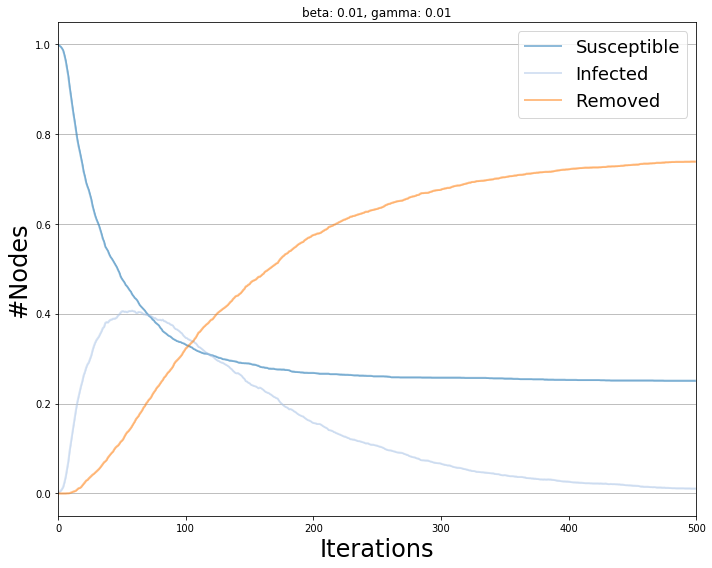

In [10]:
plt.figure(figsize=(10, 8))
viz = DiffusionTrend(model, trends)
viz.plot()

In [11]:
def plot_data(network, data, **kwargs):
    values = pair_elements(
        nx.get_node_attributes(network, "Latitude"),
        nx.get_node_attributes(network, "Longitude"),
#         model.status
#         time_infected(iterations)
        data
    )
    
    plt.scatter(values[:, 1], values[:, 0], c=values[:, 2], alpha=0.8, marker='.', **kwargs)
    plt.colorbar()

Here we have a map of the all the airports with their latitudes and longitudes, and plot the graph. This map represents the number of steps/iterations since the airport got infected, because once the airport is infected we consider it is infected forever. So the ones with ZERO (0 - at the bluer end of the spectrum) are not affected. 

Text(0.5, 1.0, 'Iterations infected')

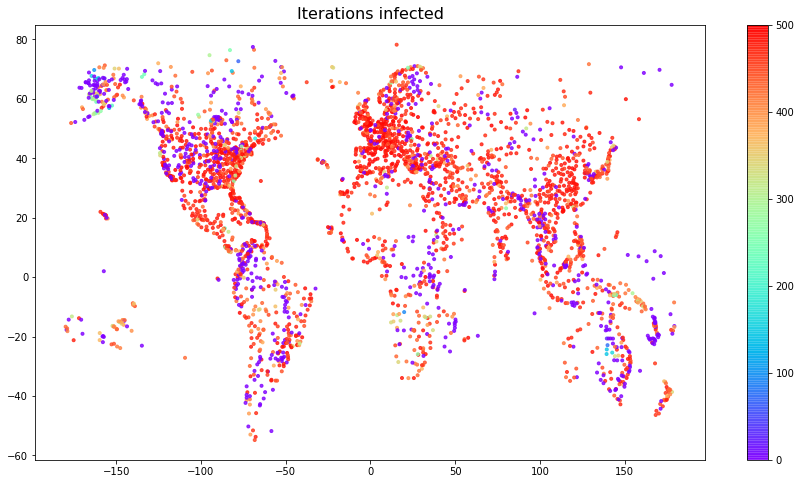

In [12]:
plt.figure(figsize=(15, 8))
plot_data(Airport_Network, time_infected(iterations), cmap='rainbow')
plt.title("Iterations infected", fontsize=16)

Run 5 iterations and check the number of airports infected.

In [13]:
num_warmup_iters = 5
model.reset()
iterations = model.iteration_bunch(num_warmup_iters)
trends = model.build_trends(iterations)

Here, we take 5 iterations, and see what airports get affectedd. So, this map represents the airports which since the airport got infected after 5 iterations. The ones with the red dots are the ones which got infected. The purple ones are the airports which did not get infected. Again, it is a spectrum from purple to red.

Text(0.5, 1.0, 'Infected airports after 5 iterations')

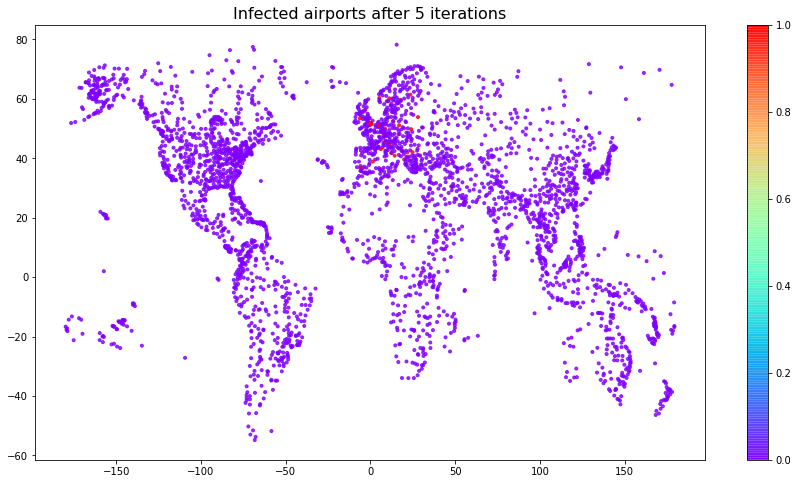

In [14]:
plt.figure(figsize=(15, 8))
plot_data(Airport_Network, {k: v>0 for k, v in time_infected(iterations).items()}, cmap='rainbow')
plt.title("Infected airports after 5 iterations", fontsize=16)

In [15]:
print("After {} iterations...".format(num_warmup_iters))
print("Airports infected: {}, airports removed: {}".format(iterations[-1]['node_count'][1], iterations[-1]['node_count'][2]))
warmup_status = model.status
airports_infected = [k for k, v in model.status.items() if v==1]

After 5 iterations...
Airports infected: 38, airports removed: 0


In [16]:
# Create a copy of the network
network_copy1 = Airport_Network.copy()
# Remove the links from the infected airports to check if this can stop the infection
for airport in airports_infected:
    edges = list(network_copy1.edges(airport))
    network_copy1.remove_edges_from(edges)

In [17]:
model_1 = init_sir_model(network_copy1, airports_infected, 0.01, 0.01)
model_1.reset()
iterations = model_1.iteration_bunch(500)
trends = model_1.build_trends(iterations)

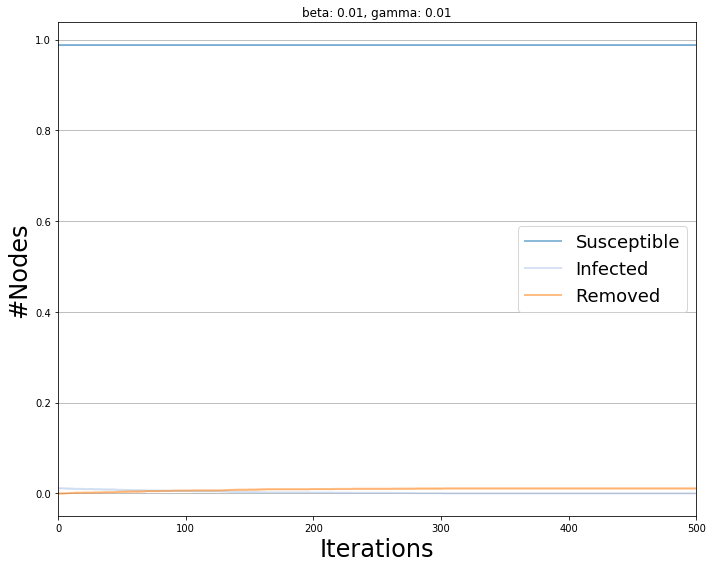

In [18]:
plt.figure(figsize=(10, 8))
viz = DiffusionTrend(model_1, trends)
viz.plot()

The expansion of the infection is stopped.

Now we analyze the evolution of the infection when we remove a subset of the edges of the infected airports. In particular, edges to nodes with high out degree are removed first.

In [19]:
def stop_infection(network, infected_airports, percentile):
    """
    Returns a copy of the input network such that a given percentage of airports that
    are neighbors of the infected_airports are closed, i.e., all the edges from the
    infected airports to them are removed.
    
    The percentile indicates that all airports in the given percentile of out-degrees
    are closed. If 100, all airports that are neighbors to infected_airports are closed.
    If 50, only half of the airports with the largest out-degree that are neighbors to
    infected_airports are closed.
    """
    
    # Compute the maximum out-degree of the neighbors of
    neighbors = set()
    for airport in infected_airports:
        for edge in network.edges(airport):
            neighbors.add(edge[1])

    # Get the neighbors and their degrees
    neighbors = list(network.out_degree(neighbors))
    # Sort the neighbors by degree
    sorted_neighbors = sorted(neighbors, key=lambda x: x[1])[::-1]
    num_blocked = int(len(neighbors) * percentile / 100.0)
    closed_airports = [i for i, _ in sorted_neighbors[:num_blocked]]
    
    print("{}/{} airports closed".format(num_blocked, len(neighbors)))
    
    # Create a copy of the network
    network = network.copy()
    for airport1 in infected_airports:
        for airport2 in closed_airports:
            # Airport2 is closed. Remove any link between airport1 and airport2.
            if network.has_edge(airport1, airport2):
                network.remove_edge(airport1, airport2)
    
    return network


In the next few steps, we model one disease that can die (not always) in the first step/city. After this step we implement, two techniques: 1) we let the disease spread for 10 iterations & cut all the edges between the community & rest of the world. This will prevent spread of infection to the rest of the world. 2) we do not cut edges of community but cut the edges between infected nodes and their adjacent ones with high degrees.


In [20]:
simulations = {}
# Run several simulations with different percentages of closed airports.
percentiles = np.arange(80, 101)
for p in percentiles:
    for iteration in range(0, 10):
        network = stop_infection(Airport_Network, airports_infected, p)
        model = init_sir_model(network, airports_infected, 0.01, 0.01)
        model.reset()
        iterations = model.iteration_bunch(800)
        trends = model.build_trends(iterations)
    
        simulations[(p, iteration)] = (model, iterations, trends)


503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
503/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
509/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
515/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
522/629 airports closed
528/629 airports closed
528/629 airports

In the following, we have 9 graphs taking different percentages of quarantined neighbors, with 10 simulations each. We start with 92% as we have observed that it corresponds to the fraction of close nodes for which we start to see a difference in the way the infection spreads. A larger range of percentages is shown below.

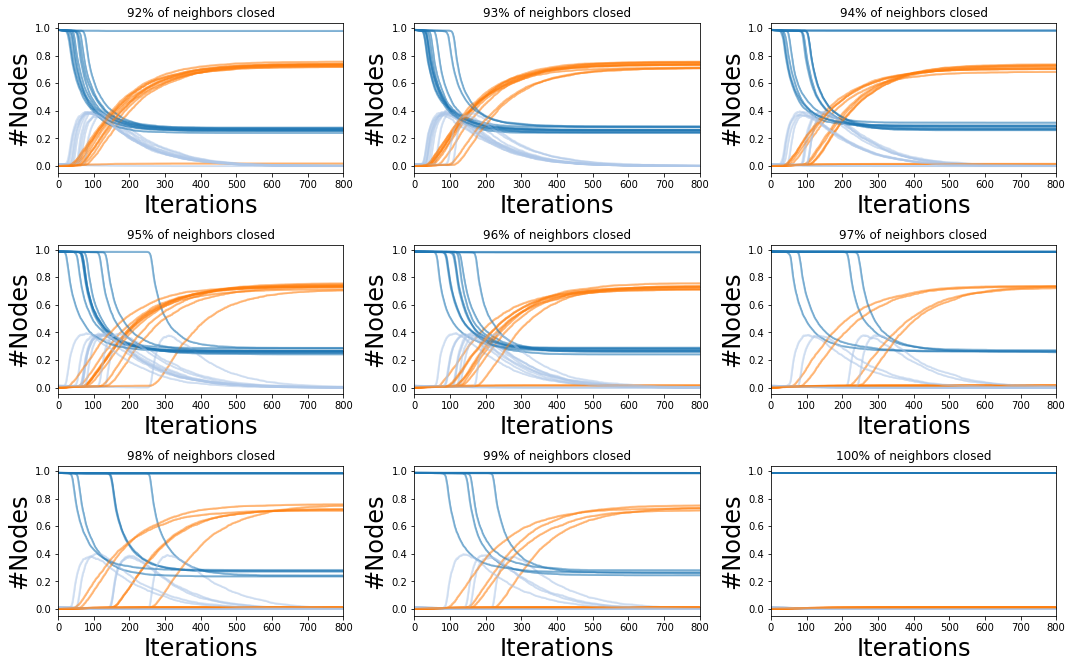

In [24]:
plt.figure(figsize=(15, 12))

for i, p in enumerate(range(92, 101)):
    plt.subplot(3, 3, i+1)
    for it in range(10):
        model, iterations, trends = simulations[(p,it)]
        viz = DiffusionTrend(model, trends,)
        viz.plot()
    plt.title("{}% of neighbors closed".format(p))
    
    plt.gca().get_legend().remove()

- Here we have shown SIR diffusion trends of the airports after 800 iterations (x-axis), where `#nodes`represent the proportion of nodes with each status. The number of iterations was chosen here as a result of a greater variability in speed of convergence of the simulation.
- We note that increasing the percentage of airports in quarantine results in earlier rise of the removed curve on average. In other words, having less airports in quarantine allow for quicker spread of the epidemics, which is logical and expected since if fewer nodes are infected at onset, more iterations are needed to reach the moment when the infection spread easily throughout the network. 
-  Moreover, we observe that increasing the percentage of nodes with high degrees results in higher variability of the diffusion trends of each status. This is due to the fact that a larger subset of airports still open allow for more similar patterns of epidemics. When there is only 1% of the neighboring airports still open, this leaves much room to variability due to the random component of the simulation. 
- The trivial answer is given when we put in quarantine all airports neighboring London, as the the infection is contain within London and there is no way to infect other nodes.

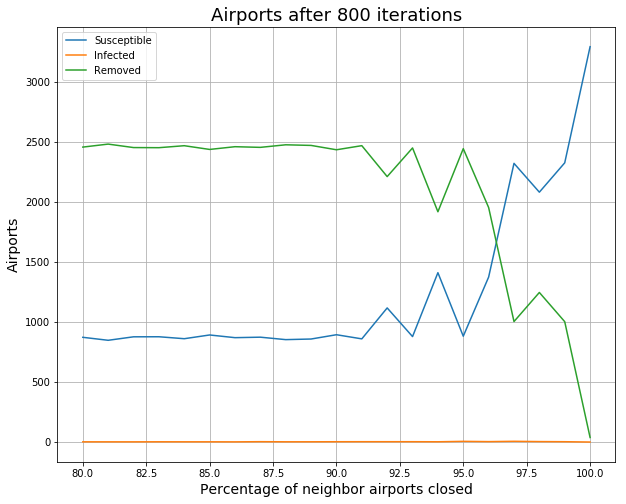

In [22]:
x = percentiles
susceptible = [np.mean([simulations[(p,iterations)][1][-1]['node_count'][0] for iterations in range(10)]) for p in x]
infected = [np.mean([simulations[(p,iterations)][1][-1]['node_count'][1] for iterations in range(10)]) for p in x]
removed = [np.mean([simulations[(p,iterations)][1][-1]['node_count'][2] for iterations in range(10)]) for p in x]

plt.figure(figsize=(10, 8))
plt.plot(x, susceptible, label="Susceptible")
plt.plot(x, infected, label="Infected")
plt.plot(x, removed, label="Removed")
plt.legend()
plt.title("Airports after 800 iterations", fontsize=18)
plt.xlabel("Percentage of neighbor airports closed", fontsize=14)
plt.ylabel("Airports", fontsize=14)
plt.grid()

- This last graph indicates the number of airports in each status when the infection starts in London, for different percentages of neighbor airports in quarantine, from 80% to 100%. 
- We see that when the percentage is in the range 80%-91%, the infection may develop in the same way.
- When the percentage grows, however, between about 91% and 100%, different outcomes are possible. We see that, globally, the removed curve starts to decrease and seem to follow an exponential decrease. Similarly, the susceptible curve seems to increase exponentially. (To be sure, we would perhaps need to do an average of this plot and fit this range to exponential laws.)
- Therefore, it is only after about 91% of neighbor airports closed that we start to observe a difference and that epidemics is contained.


# 3) Conclusion 

**Main analysis and findings**:

The chosen dataset is the world airport network. Using this network, we wanted to analyze, if there is an outbreak of a contagious disease in an airport, how it would spread geographically across the world using the world flight traffic network and which airports should be targeted to impose quarantine(s). To answer this, three different steps in our reasoning were made.

In a first time, we try to find out the property of the network by visualizing it and by conducting the classical analysis of a network (degree distribution, connectivity, distance, clustering coefficient, centrality measure, reversed graph analysis, homophily, and community). Thanks to these processes, the presence of communities which are defined by country homophily have been underlined. These communities will be extremely important in our analysis of the spreading of the infection as one of the quarantine technics will be based on it. Moreover, the importance of hubs like London Heathrow has been observed and will have a huge impact on spreading.

In the second part of our global reasoning, the goal was to gain insights into how an infection would spread on the world if it started in a given city and use the network of air routes to spread. The modelization of a pandemic starting in three different cities of various importance in terms of their role in the flight global network has allowed us to confirm expected characteristics of the infection's spread : we observe that the size of the city or, even, the sizes of the airports which belong to a city, do not matter much in how far, in terms of geographical spread, the pandemic will go. However, we do notice that the main difference is the fact that the more important the city is, the sooner the epidemic will go from being very regional and contained to an epidemic of a global scale, that is, a pandemic. To found out these conclusions, we used the standard library to model and simulate the SIR model on a graph. The tuning of the parameters of the model was an important step to allow us to study a realistic model with an infection that could die in the city of the first apparition.

In a third time, we mixed all the information we gather from the two previous part and we try to analyze two technics of quarantine: first, we let the disease spread for 3 iterations and cut all the edges between the community and the rest of the world. In the second method we do not cut edges of the community but cut the edges between infected nodes and their adjacent neighbors with high degrees. The effectiveness of this first technic has been proven in the study. The infection stopped spreading and died. The second technic showed a more variable behavior: we noted that increasing the percentage of airports in quarantine results in an earlier rise of the removed curve on average and that increasing the percentage of nodes with high degrees results in higher variability of the diffusion trends of each status.

To conclude our analysis, the best technic to save the world from a huge infection is to put in quarantine all the infected airports. This is the trivial solution that works well but this answer is not realistic. The two technics previously described are more realistic and can stop the spreading as it has been showed in our report.



**Limitations of the SIR model** : 
- There are certain drawbacks to the SIR model. First, it does not take into account the people being born, and the people dying. In the context of nodes as individuals, that is, the people who are new to the susceptible category and the ones who are removed from the susceptible, infected and recovered categories. In other words, the population is not dynamic. Here, considering the times it takes to build an airport and the (plausible) fact that airport do not tend to be abandoned (yet debatable), this is not the main drawback of the SIR model. 
- When doing network epidemics, one must focus on one type of disease more precisely as the type of the disease (or a particular disease itself) as characteristics which will determine whether the removed/recovered is valid, for example.
- In a globalized world where large fluxes of people, it seems not unreasonable to assume that an infectious disease may never really vanish from a network on which it travels. Rather, there are phases of revival and containment which alternates. For this reason, the SIS model is good alternative to the SIR model.

# 4) Project Structure Appendix


**Raw Data Files**
All the raw data files are contained in the Folder *openflights* where you can find the following files:
   * *airports.dat.txt*: File containing airports information like for example Longitude, Latitude, Key, Country ...
   * *meta.openflights* : File containing a brief description of the data.
   * *out.openflights* : File containing all the information for the creation of our graph (edges list).
   * *README.openflights* : File containing information about the openflights files.
   * *routes.dat.txt *: File containing the routes information allowing the merging of the data with specific keys.

**Cleaning/preparation code/notebooks**

- The notebook *Load_data.ipynb* is a notebook explaining how the data was loaded and how external data (name of countries and cities) were added to each node of the graph. It also checks if the output of this process is reliable.
- The python file *load_data.py* contains the functions allowing the loading of the data with external information.
- The python file *utils.py* contains utils functions which are mainly visualization function.

**Analysis notebooks**

- *Weighted_network.ipynb* : Notebook explaining how to change the edges to create a weighted graph.
- *Geographical_representation.ipynb* : Notebooking explaining how we create geographical analysis.
- *Global_analysis.ipynb* : Notebook made for the analysis of basic properties of the network like degree distribution, network distance, connectivity, clustering coefficient, centrality measure ... 
- *Homophily_analysis.ipynb*: Notebook explaining how our Homophily analysis has been done and our conclusions.
- *Community_analysis.ipynb*: Notebook explaining how our Community analysis has been done and our conclusions.
- *Selected_airports.ipynb* : Notebook showing how we analyzed the geographical spread of the infection with density mapping of the infection probability, for different airports
- *Epidemics.ipynb* : Notebook containing the entire quarantine analysis.
- ***Report.ipynb* : Notebook where the analysis to answer our problematic has been done.**